<font color="red" size=3px><b>Problem Statement</b>
    </font>
    
#### Predict whether a booking will be canceled or not to allow the hotel’s manager to make better decisions in order to improve overbooking strategies and cancellation policies.

<font color="red" size=3px><b>About the dataset (hotel_booking.csv)</b>
    </font>

This data set contains a single file which compares various booking information between two hotels: a city hotel and a resort hotel.

Attribute Information:

**Hotel:** Hotel (H1 = Resort Hotel or H2 = City Hotel)

**is_canceled:** Value indicating if the booking was canceled (1) or not (0)

**lead_time:** Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

**arrival_date_year:** Year of arrival date

**arrival_date_month:** Month of arrival date

**arrival_date_week_number:** Week number of year for arrival date

**arrival_date_day_of_month:** Day of arrival date

**stays_in_weekend_nights:**	Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

**stays_in_week_nights:**	Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

**adults:**	Number of adults

**children:**	Number of children

**babies:**	Number of babies

**meal:**	Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)

**country:**	Country of origin. Categories are represented in the ISO 3155–3:2013 format

**market_segment:**	Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

**distribution_channel:**	Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

**is_repeated_guest:**	Value indicating if the booking name was from a repeated guest (1) or not (0)

**previous_cancellations:**	Number of previous bookings that were cancelled by the customer prior to the current booking

**previous_bookings_not_canceled:**	Number of previous bookings not cancelled by the customer prior to the current booking

**reserved_room_type:**	Code of room type reserved. Code is presented instead of designation for anonymity reasons

**assigned_room_type:**	Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

**booking_changes:**	Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

**deposit_type:**	Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay

**agent:**	ID of the travel agency that made the booking

**company:**	ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

**days_in_waiting_list:**	Number of days the booking was in the waiting list before it was confirmed to the customer

**customer_type:**	Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking

**adr:**	Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
required_car_parking_spaces	Number of car parking spaces required by the customer

**total_of_special_requests:**	Number of special requests made by the customer (e.g. twin bed or high floor)

**reservation_status:**	Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why

**reservation_status_date:**	Date at which the last status was set. This variable can be used in conjunction with the Reservation Status to understand when was the booking canceled or when did the customer checked-out of the hotel

#### Target Variable : 'is_canceled'
<br>

<font color="red" size=3px><b>Importing libraries</b>
    </font>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# import 'stats' package from scipy library
from scipy import stats

# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare
from scipy.stats import f_oneway

# function to perform post-hoc test
import statsmodels.stats.multicomp as mc
from sklearn.preprocessing import LabelEncoder, StandardScaler

import statistics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import cohen_kappa_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

import pydotplus
from IPython.display import Image
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

<font color="red" size=3px><b>Importing the data from csv</b>
    </font>

In [3]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.shape

(119390, 32)

#### The data consists of 1,19,390 observations and 32 features
<br>

In [5]:
df.dtypes.value_counts()

int64      16
object     12
float64     4
dtype: int64

#### There are 16 integer data type columns, 12 object datatype columns and 4 float datatype columns
<br>

<font color="red" size=3px><b>Basic Understanding of the data</b>
    </font>

In [6]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

<font color="green" size=2.9px><b>There are some columns with null value in the data frame we will need to imputing and there's huge amount of missing value in the company column this might need to be drop.</b>
    </font>
    
<br>

**Data types:**

**Categorical** - hotel, is_canceled, customer_type, is_repeated_guest, meal, country, market_segment, distribution_channel, reserved_room_type, assigned_room_type, deposit_type, agent, company, reservation_status,

**Numerical** - lead_time, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, previous_cancellations, booking_changes, previous_bookings_not_canceled, days_in_waiting_list, adr, required_car_parking_spaces, total_of_special_requests

**Ordinal** - arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, reservation_status_date

In [7]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


<font color="green" size=2.9px><b>1. There's an adr that's negative, we will do a deeper analysis on this because it's impossible to have a neagtive daily rate as the hotel.<br>
2. There's 0 adult in the data as well we will do a deeper analysis on this because is impossible to have a booking with 0 adult. <br>
3. The following columns previous_cancellations, previous_bookings_not_canceled, booking_changes days_in_waiting_list, required_car_parking_spaces, total_of_special_requests have only a maximum value. This shows that these features contribute to the decision of cancellation only in very few cases</b>
    </font>
    
<br>

In [8]:
df.describe(include = 'O')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


<font color="green" size=2.9px><b>1. Almost half of the booking were made from portugal.<br>
    2. In this case city hotel is more favored compared to resort hotel.<br>
    3. There is a discrepancy of reserved room type and assigned room type.<br> 
    4. No deposit here might have a reason why cancellation is high (since customer will not have anything to lose in this no deposit case).<br>
    5. most popular room is room type A</b>
    </font>
    
<br>

**Assumptions about cancellation**:

1. The type of hotel decides the cancelation rate with higher cancellations in city hotels as compared to resort hotels due to variety of facilities available in resort hotels.

2. The earlier the booking made, higher the chances of cancellation.

3. Customers who have bookings for longer durations have lesser chance of cancelling their booking.

4. As more children or babies are involved in the booking, higher chances of cancellation.

5. Old guest (is_repeated_guest=1) is less likely to cancel current booking.

6. If there are high previous cancellations, possibility of cancellation of current booking is also high.

7. If room assigned is not the same as reserved room type, customer might positively cancel the booking.

8. Higher the number of changes made to the booking, lesser is the chance of cancellation due to the investment of time in curating the booking as per one's requirement.

9. Bookings that are refundable or for which deposits were not made at the time of booking stand a high chance of cancelation.

10. If the number of days in waiting list is significant, customer might make some other booking due to uncertainty of confirmation of current booking.

In [9]:
df.corr(method='pearson')['is_canceled'][:]

is_canceled                       1.000000
lead_time                         0.293123
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month        -0.006130
stays_in_weekend_nights          -0.001791
stays_in_week_nights              0.024765
adults                            0.060017
children                          0.005048
babies                           -0.032491
is_repeated_guest                -0.084793
previous_cancellations            0.110133
previous_bookings_not_canceled   -0.057358
booking_changes                  -0.144381
agent                            -0.083114
company                          -0.020642
days_in_waiting_list              0.054186
adr                               0.047557
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
Name: is_canceled, dtype: float64

**highest positive correlations** : lead_time followed by previous_cancellations

**highest negative correlations** : total_of_special_requests, required_car_parking_spaces

In [10]:
df[df.duplicated(keep='first')]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


<font color="green" size=2.9px><b>Our dataset contains duplicates. However, it is possible that multiple bookings with the same features were made on the same say. Since we do not have a feature such as "booking ID", we cannot say for sure that those are true duplicates.
    
<b>Note:</b>For modeling purposes, models were run with and without the duplicates and greater predictive power was found when the "duplicates" were included. As a result, we will keep the "duplicates"..</b>
    </font>
    
<br>

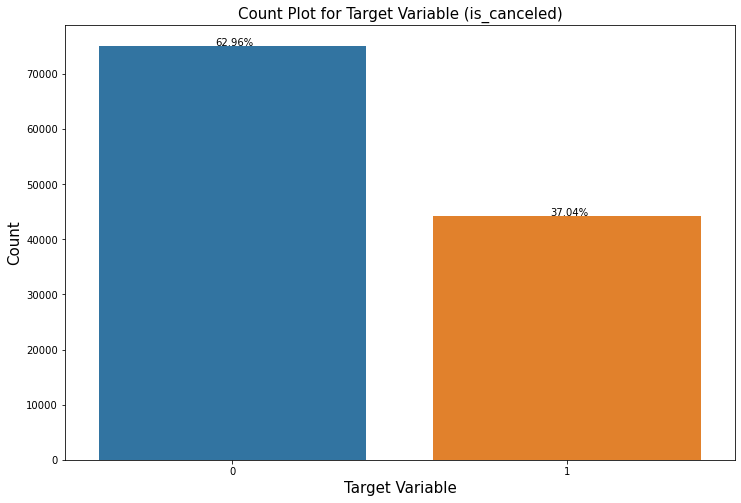

In [11]:
df_target = df['is_canceled'].copy()
df_target.value_counts()
sns.countplot(x = df_target)
plt.text(x = -0.05, y = df_target.value_counts()[0] + 1, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')
plt.text(x = 0.95, y = df_target.value_counts()[1] +1, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')
plt.title('Count Plot for Target Variable (is_canceled)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

**Interpretation:** The above plot shows that there is no imbalance in the target variable.

<font color="red" size=5px><b>Univariate Analysis</b>
    </font></b>
    </font>

<font color="red" size=3px><b>'Hotel'</b>
    </font>

In [12]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [13]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

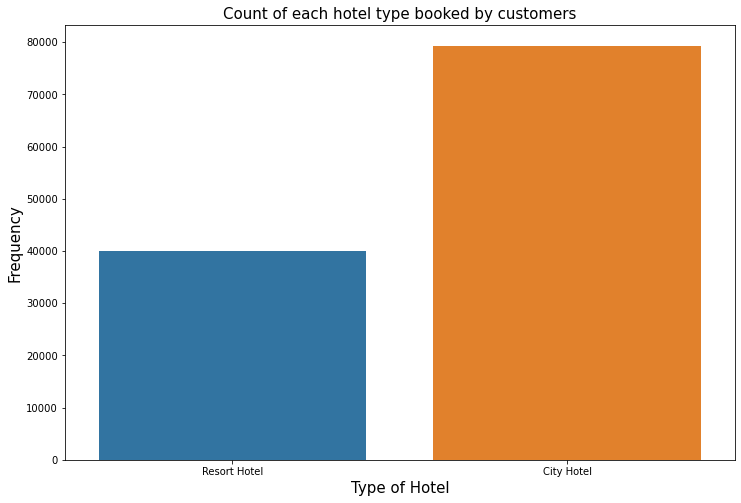

In [14]:
sns.countplot(data=df, x='hotel')
plt.title('Count of each hotel type booked by customers', fontsize = 15)
plt.xlabel('Type of Hotel', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.show()

<font color="green" size=2.9px><b>There are more number of bookings of 'city hotel' type than 'resort hotel' type.</b>
    </font>
    
<br>

<font color="red" size=3px><b>'is_canceled'</b>
    </font>

In [15]:
df['is_canceled'].unique()

array([0, 1], dtype=int64)

<font color="green" size=2.9px><b>'is_canceled' is target numerical column. Here '1' = 'cancelled' and '0' = 'not cancelled. For Univariate and Bivariate analysis, we are replacing encoded values into respective strings and change the data type to object, so that we find the significant features with respect to target variable. After EDA, we undo the target variable for the model building </b>
    </font>

In [16]:
df['is_canceled'] = df['is_canceled'].astype('object')

In [17]:
df['is_canceled'] = df['is_canceled'].replace([0,1],['not_cancelled','cancelled'])

In [18]:
df['is_canceled'].unique()

array(['not_cancelled', 'cancelled'], dtype=object)

In [19]:
df['is_canceled'].dtype

dtype('O')

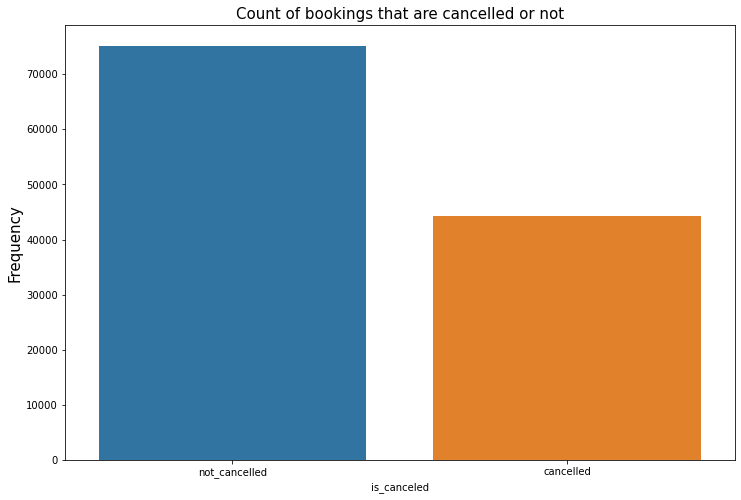

In [20]:
sns.countplot(data=df, x='is_canceled')
plt.title('Count of bookings that are cancelled or not', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.show()

In [21]:
df['is_canceled'].value_counts() / len(df) * 100

not_cancelled    62.958372
cancelled        37.041628
Name: is_canceled, dtype: float64

<font color="green" size=2.9px><b>Number of bookings that are cancelled accounts to 37% which will effect the Revenue of the industry </b>
    </font>
    
<br>

<font color="red" size=3px><b>'arrival_date_month'</b>
    </font>

In [22]:
df['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [23]:
df['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

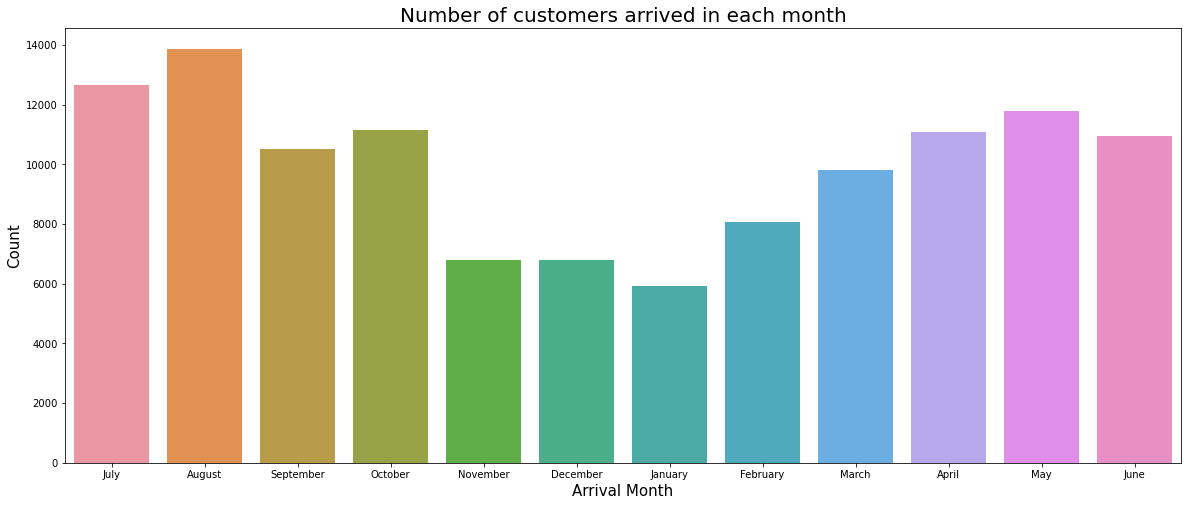

In [24]:
plt.figure(figsize=(20,8))
sns.countplot(data=df,x=df['arrival_date_month'])
plt.title('Number of customers arrived in each month', fontsize = 20)
plt.xlabel('Arrival Month', fontsize = 15)
plt.ylabel('Count', fontsize =15)
plt.show()

<font color="green" size=2.9px><b>We can see from the graph that most of the customers are likely to come in 'August' month and least in 'January' month.</b>
    </font>

<br>

<font color="red" size=3px><b>'meal'</b>
    </font>

In [25]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [26]:
df['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

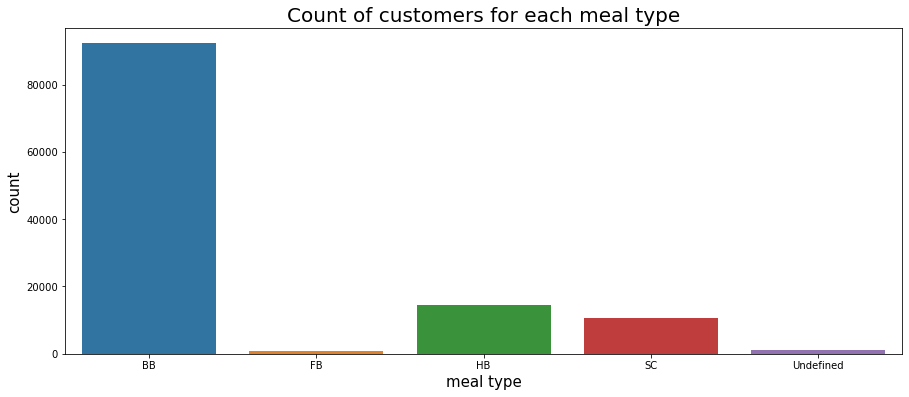

In [27]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x=df['meal'])
plt.title('Count of customers for each meal type', fontsize = 20)
plt.xlabel('meal type', fontsize = 15)
plt.ylabel('count', fontsize =15)
plt.show()

<font color="green" size=2.8px><b>Most of the customer prefers 'BB'(Bed & Breakfast) meal type .</b>
    </font>
    
<br>

<font color="red" size=3px><b>'country'</b>
    </font>

In [28]:
df['country'].dtype

dtype('O')

In [29]:
len(df['country'].unique())

178

There are 178 unique countries in the country column

In [30]:
df['country'].value_counts().unique()

array([48590, 12129, 10415,  8568,  7287,  3766,  3375,  2342,  2224,
        2104,  2097,  1730,  1279,  1263,  1024,   999,   919,   669,
         632,   607,   500,   447,   435,   426,   362,   287,   259,
         248,   230,   214,   197,   171,   152,   133,   128,   103,
         101,   100,    85,    83,    81,    80,    75,    74,    71,
          68,    67,    65,    59,    57,    55,    51,    48,    40,
          39,    35,    34,    32,    31,    29,    28,    27,    26,
          24,    22,    21,    19,    18,    17,    16,    15,    14,
          13,    12,    11,    10,     9,     8,     7,     6,     5,
           4,     3,     2,     1], dtype=int64)

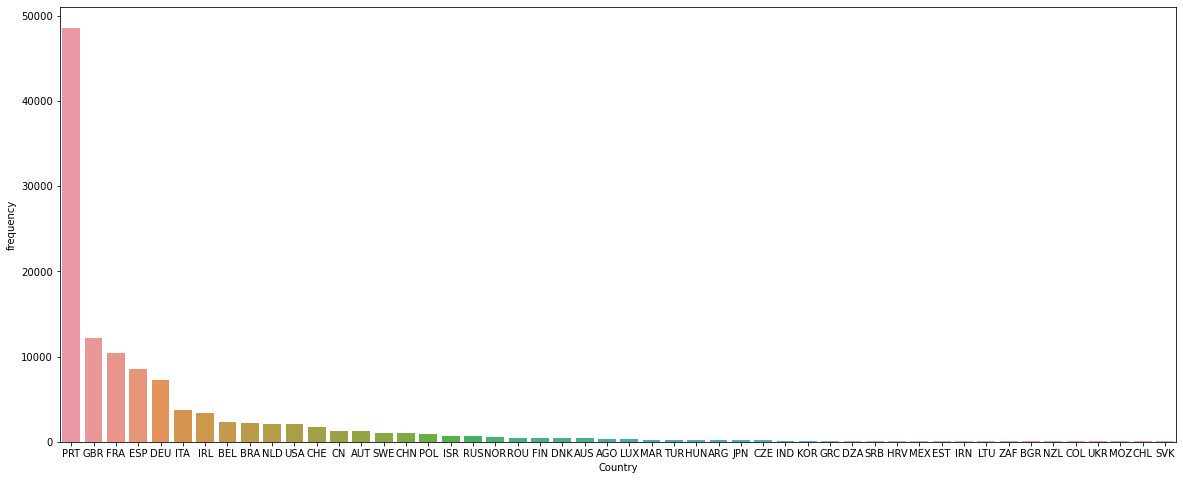

In [31]:
plt.figure(figsize=(20,8))
df_country = pd.DataFrame(df['country'].value_counts())
df_country.reset_index(inplace = True)
df_country.columns = ['Country', 'frequency']
sns.barplot(data = df_country[df_country['frequency']>60], x = 'Country', y = 'frequency')
plt.show()

<font color="green" size=2.8px><b>1.We can see that the frequency of country 'PRT' is high among all other countries i.e most of the customers are from the portugal country and bookings are more from portugal country.<br>
2.Since that there's so many unique values from all the countries where the booking comes from we will try to group it into continent or we will group it into booking from portugal and booking from outside portugal since both of the hotel are in portugal<br>
3. it's kind of make sense to split the booking into international booking or local booking</b>
    </font>
<br>

In [32]:
countries = []

for i in df['country']:
    if i == 'PTR':
        countries.append('Local')
    else:
        countries.append('International')

In [33]:
df['country_location'] = countries

<font color="red" size=3px><b>'market_segment'</b>
    </font>

In [34]:
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

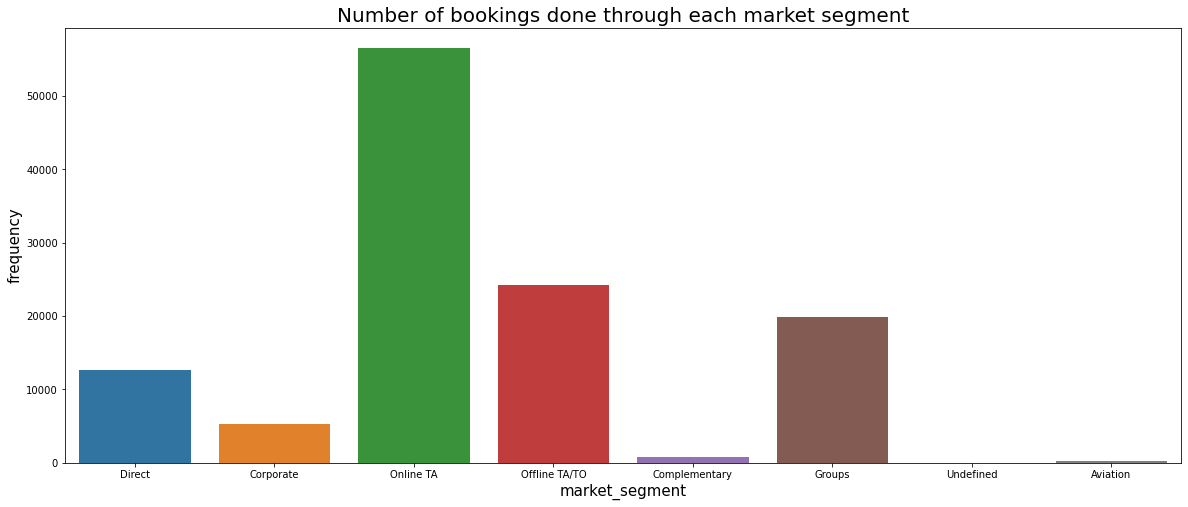

In [35]:
plt.figure(figsize=(20,8))
sns.countplot(data=df, x=df['market_segment'])
plt.title('Number of bookings done through each market segment', fontsize = 20)
plt.xlabel('market_segment', fontsize = 15)
plt.ylabel('frequency', fontsize =15)
plt.show()

<font color="green" size=2.8px><b>Most of the booking are done through 'Online TA' segment. This is fact because most of the customer uses technology to book the hotel through online via mobile apps or from booking website.<br>There are couple of undefined values as well, we will replace it with mode here in this case is 'Online TA'</b>
    </font>
<br>

In [36]:
df['market_segment'] = df['market_segment'].replace('Undefined', 'Online TA')

<font color="red" size=3px><b>'distribution_channel'</b>
    </font>

In [37]:
df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [38]:
df['distribution_channel'].value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

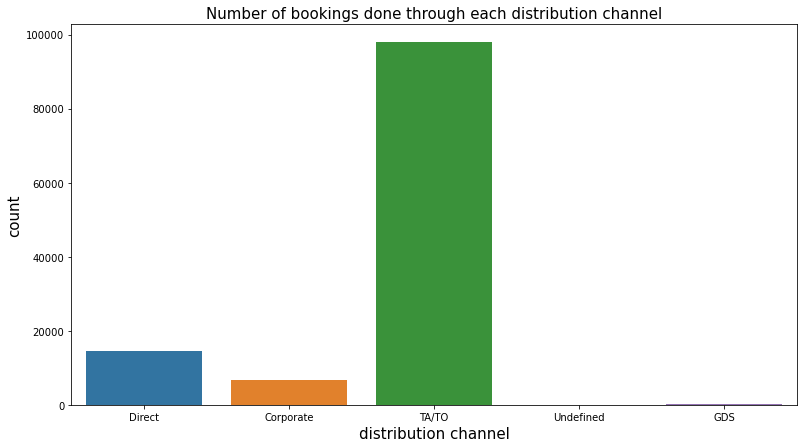

In [39]:
plt.figure(figsize=(13,7))
sns.countplot(data=df, x = df['distribution_channel'])
plt.title('Number of bookings done through each distribution channel', fontsize = 15)
plt.xlabel('distribution channel',fontsize = 15)
plt.ylabel('count',fontsize =15)
plt.show()

<font color="green" size=2.8px><b>we can see from the graph that most of the bookings occured through TA/TO distribution channel. we will treat the undefined values as TA / TO</b>
    </font>
<br>
 

In [40]:
df['distribution_channel'] =  df['distribution_channel'].str.replace('Undefined', 'TA/TO')

<font color="red" size=3px><b>'reserved_room_type'</b>
    </font>

In [41]:
df['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [42]:
df['reserved_room_type'].value_counts()

A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

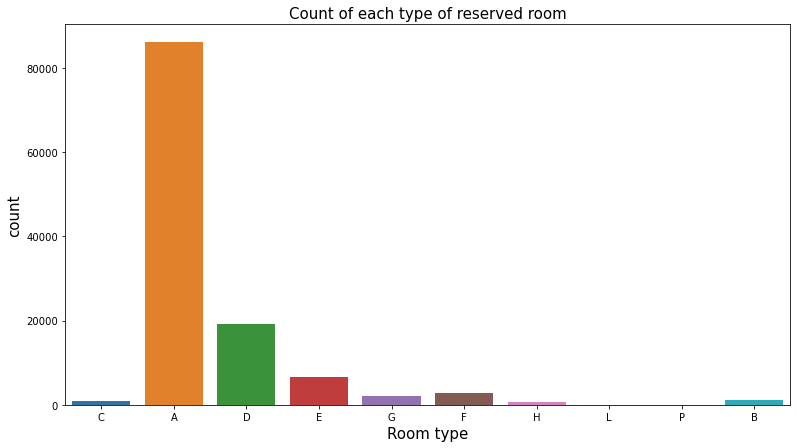

In [43]:
plt.figure(figsize=(13,7))
sns.countplot(data=df, x = df['reserved_room_type'])
plt.title('Count of each type of reserved room', fontsize = 15)
plt.xlabel('Room type',fontsize = 15)
plt.ylabel('count',fontsize =15)
plt.show()

<font color="green" size=2.8px><b>We can see from the graph that 'A' room type has more number of reservation than other room types. This may be the reason that 'A' room type is luxurious and meets most the customers demands.</b>
    </font>
<br>

<font color="red" size=3px><b>'assigned_room_type'</b>
    </font>

In [44]:
df['assigned_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [45]:
df['assigned_room_type'].value_counts()

A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
P       12
L        1
Name: assigned_room_type, dtype: int64

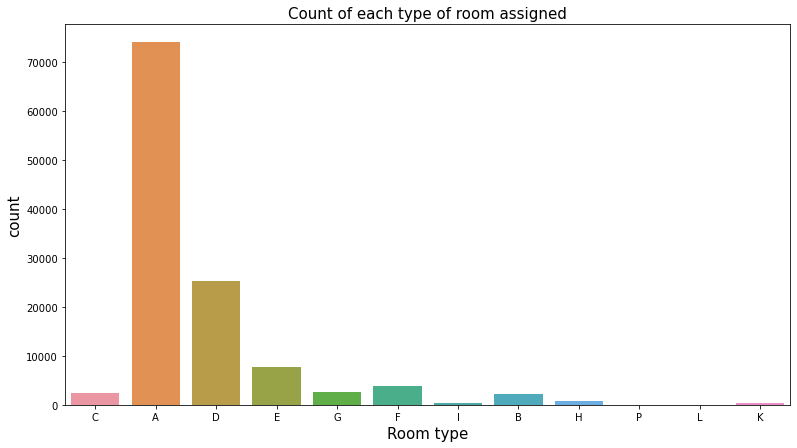

In [46]:
plt.figure(figsize=(13,7))
sns.countplot(data=df, x = df['assigned_room_type'])
plt.title('Count of each type of room assigned', fontsize = 15)
plt.xlabel('Room type',fontsize = 15)
plt.ylabel('count',fontsize =15)
plt.show()

<font color="green" size=2.8px><b>Room type 'A' has assigned to more number of customers. That means most of the customers who booked 'A' room type was assigned the same room type 'A'</b>
    </font>
<br>

<font color="red" size=3px><b>'deposit_type'</b>
    </font>

In [47]:
df['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [48]:
df['deposit_type'].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

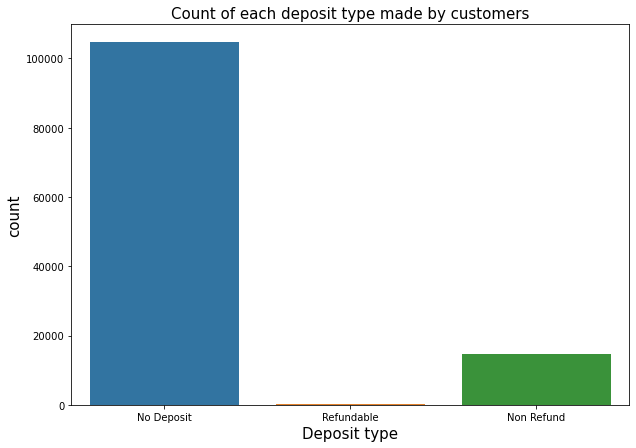

In [49]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, x = df['deposit_type'])
plt.title('Count of each deposit type made by customers', fontsize = 15)
plt.xlabel('Deposit type',fontsize = 15)
plt.ylabel('count',fontsize =15)
plt.show()

<font color="green" size=2.8px><b>1.No deposit type is the most popular compared to other deposit types.<br>
2.this might be the reason why the cancellation in the industry has been on a rise, the flexibility that's given to the customer to book hotel without any deposit</b>
    </font>
<br>

<font color="red" size=3px><b>'customer_type'</b>
    </font>

In [50]:
df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [51]:
df['customer_type'].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

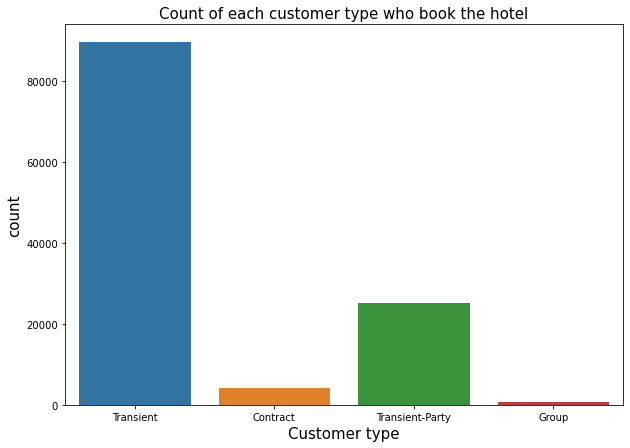

In [52]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, x = df['customer_type'])
plt.title('Count of each customer type who book the hotel', fontsize = 15)
plt.xlabel('Customer type',fontsize = 15)
plt.ylabel('count',fontsize =15)
plt.show()

<font color="green" size=2.8px><b>The count of 'Transient' is high i.e more number of booking are done by 'Transient' customers..</b>
    </font>

Transient means a person who is staying or working in a place for a short time only.

<br>

<font color="red" size=3px><b>'reservation_status'</b>
    </font>

In [53]:
df['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [54]:
df['reservation_status'].value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

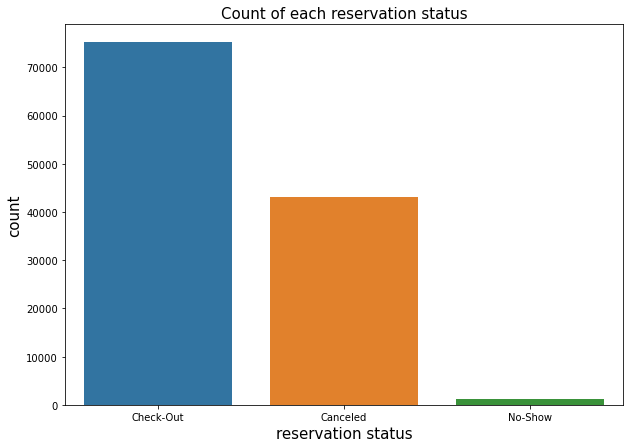

In [55]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, x = df['reservation_status'])
plt.title('Count of each reservation status', fontsize = 15)
plt.xlabel('reservation status',fontsize = 15)
plt.ylabel('count',fontsize =15)
plt.show()

<font color="green" size=2.8px><b>The count 'Check-out' is more than other reservation status because the customers checked-in but left already before the check-out date</b>
    </font>

<font color="red" size=3.5px><b>'Numerical Variables'</b>
    </font>

<font color="red" size=3px><b>'lead_time'</b>
    </font>

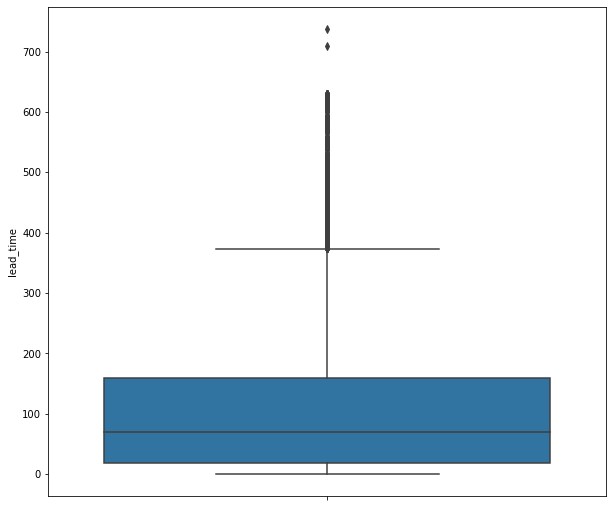

Mean of lead_time is 104.01141636652986


In [56]:
plt.figure(figsize=(10,9))
sns.boxplot(y = df['lead_time'])
plt.show()
print('Mean of lead_time is', df['lead_time'].mean() )

**Since the're are many unique values in the lead time we will group it into months before we do analysis on those so hopefully we can see a trend from binning lead time into months**

In [57]:
lead_time_months = df['lead_time'] // 30
lead_time_months.value_counts() / len(df)
df['lead_time_month'] = df['lead_time'] // 30

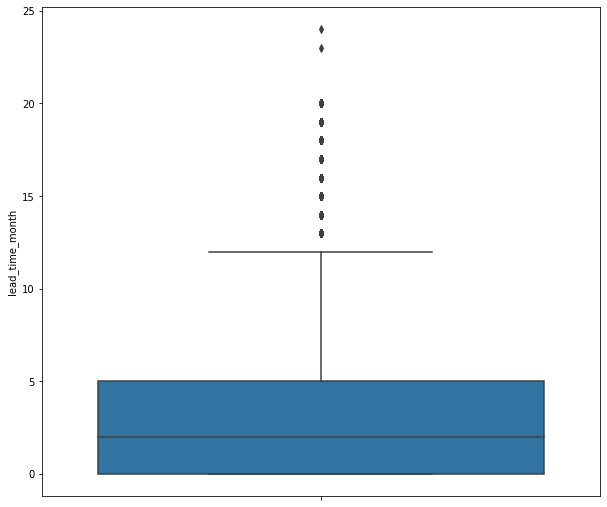

Mean of lead_time is 3.0553145154535555


In [58]:
plt.figure(figsize=(10,9))
sns.boxplot(y = df['lead_time_month'])
plt.show()
print('Mean of lead_time is', df['lead_time_month'].mean() )

In [59]:
df['lead_time_month'].value_counts()

0     38047
1     17193
2     12726
3     10475
4      8074
5      7913
6      5726
7      4369
9      3447
8      3440
10     2747
11     1790
12      978
13      816
15      566
14      532
20      145
16      123
17      122
18       91
19       68
24        1
23        1
Name: lead_time_month, dtype: int64

<font color="green" size=2.8px><b>We can see that here majority of the booking were made during the same month as the planned arrival. However there are some booking that's made a year or more ahead before the arrival.</b>
    </font>

<font color="red" size=3px><b>'previous_cancellation'</b>
    </font>

In [60]:
df['previous_cancellations'].value_counts()

0     112906
1       6051
2        116
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: previous_cancellations, dtype: int64

<AxesSubplot:>

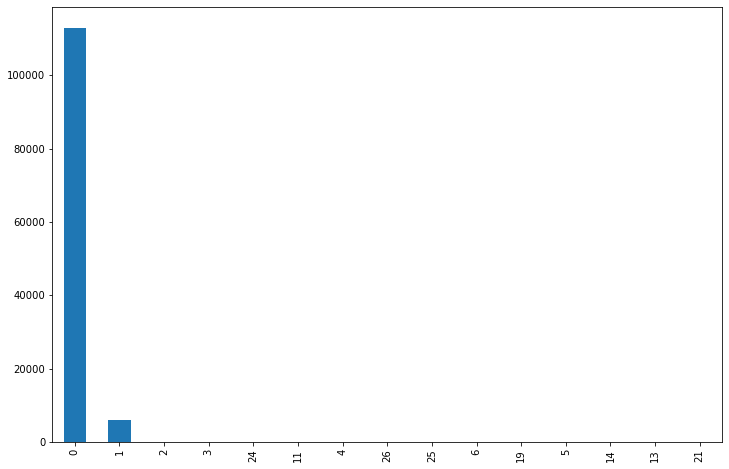

In [61]:
df['previous_cancellations'].value_counts().plot(kind='bar')

<font color="green" size=2.8px><b>We can see that most of the bookings never been cancelled before in this data set.We will group this into booking that's never been cancelled or have been cancelled before.</b>
    </font>

In [62]:
prev_can = []

for i in df['previous_cancellations']:
    if i==0:
        prev_can.append(0)
    else:
        prev_can.append(1)

df['is_previously_cancelled'] = prev_can

<font color="red" size=3px><b>'booking_changes'</b>
    </font>

In [63]:
df['booking_changes'].value_counts()

0     101314
1      12701
2       3805
3        927
4        376
5        118
6         63
7         31
8         17
9          8
10         6
13         5
14         5
15         3
16         2
17         2
12         2
11         2
20         1
21         1
18         1
Name: booking_changes, dtype: int64

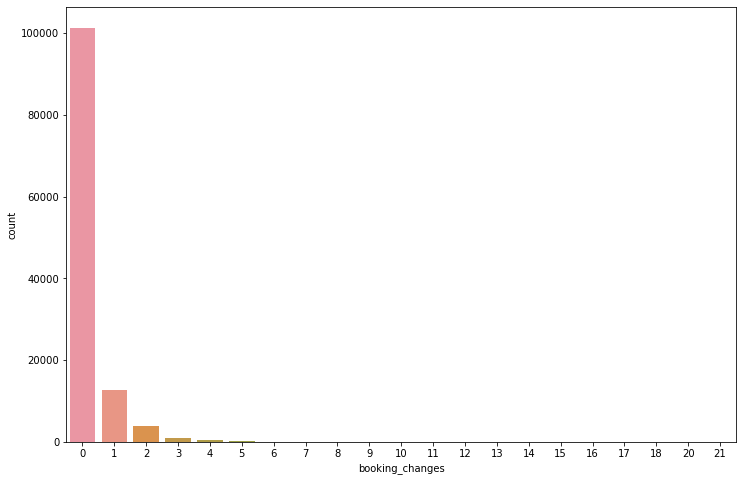

In [64]:
sns.countplot(df['booking_changes'])
plt.show()

<font color="green" size=2.8px><b>Almost most of the customers never change their booking. Since there are many values of this booking changes column we will group it in to does the booking ever been changes or not .</b>
    </font>

In [65]:
booking_change = []
for i in df['booking_changes']:
    if i==0:
        booking_change.append(0)
    else:
        booking_change.append(1)

In [66]:
df['is_booking_changed'] = booking_change

<font color="red" size=3px><b>'adr'</b>
    </font>

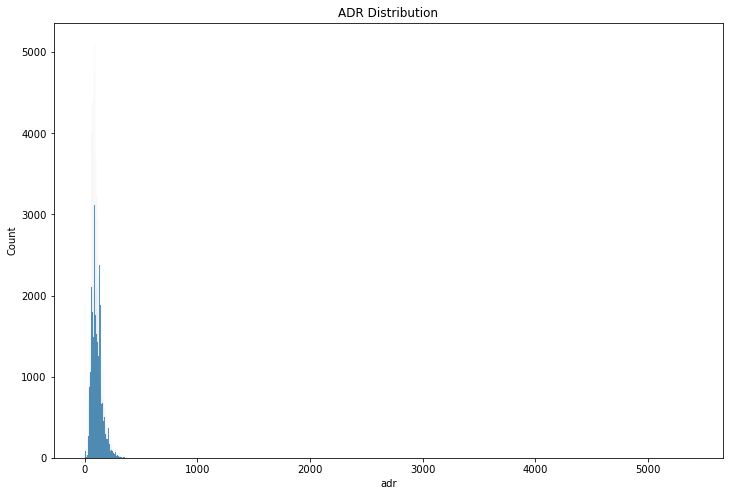

In [67]:
sns.histplot(data=df, x='adr')
plt.title('ADR Distribution')
plt.show()

<font color="red" size=3px><b>'days_in_waiting_list'</b>
    </font>

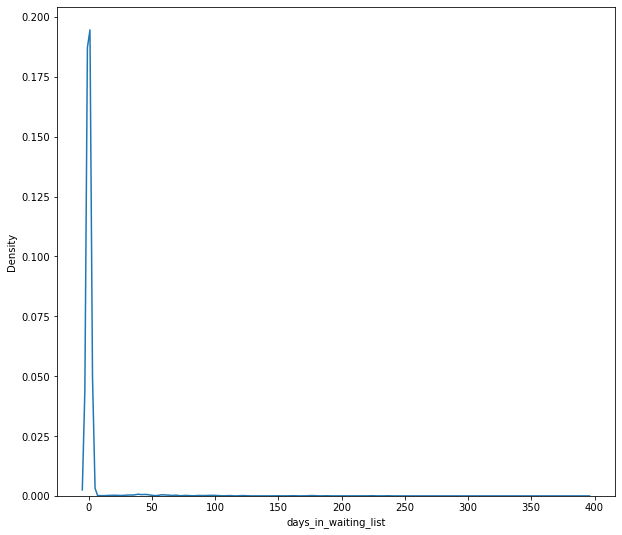

In [68]:
plt.figure(figsize=(10,9))
sns.kdeplot(df['days_in_waiting_list'])
plt.show()

<font color="green" size=2.8px><b>We can see that most of the customers had '0' days of waiting before their booking is confirmed i.e their booking is confirmed on the same day their booked a hotel.</b>
    </font>

<font color="red" size=3px><b>'is_repeated_guest'</b>
    </font>

In [69]:
df['is_repeated_guest'].value_counts()

0    115580
1      3810
Name: is_repeated_guest, dtype: int64

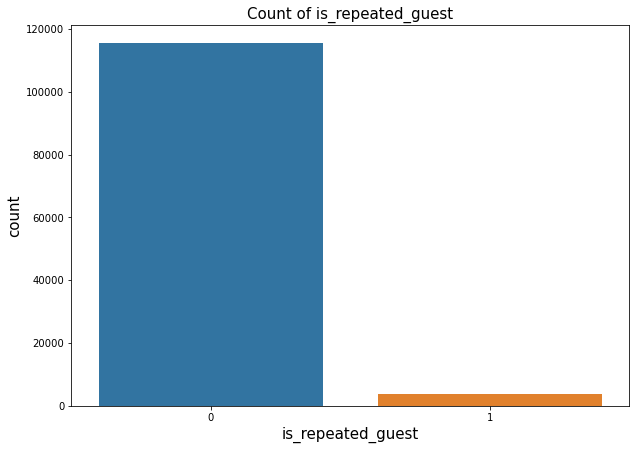

In [70]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, x = df['is_repeated_guest'])
plt.title('Count of is_repeated_guest', fontsize = 15)
plt.xlabel('is_repeated_guest',fontsize = 15)
plt.ylabel('count',fontsize =15)
plt.show()

<font color="green" size=2.8px><b>We see that there are only less number of repeated guest from this booking. This might be affecting the cancellation of the hotel from the low rate of loyal customers.<br>
</b>
    </font>

<font color="red" size=3px><b>'total_of_special_requests'</b>
    </font>

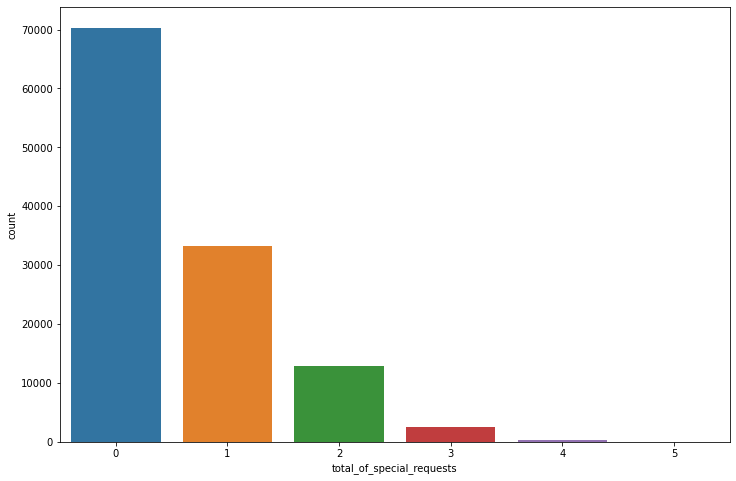

In [71]:
sns.countplot(df['total_of_special_requests'])
plt.show()

<font color="green" size=2.8px><b>We can see that most of the customers have no special requests.<br>
</b>
    </font>
   
<br>

<font color="red" size=5px><b>Bivariate Analysis</b>
    </font></b>
    </font>

<font color="red" size=3px><b>Categorical columns vs Target Variable</b>
    </font></b>
    </font>

#### Defining the function to find the chi-square value to check whether the two categorical columns are independent or not

In [72]:
def chi_square(df, col1, col2):    
    #---create the contingency table---
    df_cont = pd.crosstab(index = df[col1], columns = df[col2])
    display(df_cont)
    
    #---calculate degree of freedom---
    degree_f = (df_cont.shape[0]-1) * (df_cont.shape[1]-1)
    
    #---sum up the totals for row and columns---
    df_cont.loc[:,'Total']= df_cont.sum(axis=1)
    df_cont.loc['Total']= df_cont.sum()
    print('---Observed (O)---')
    display(df_cont)
    
    #---create the expected value dataframe---
    df_exp = df_cont.copy()    
    df_exp.iloc[:,:] = np.multiply.outer(
        df_cont.sum(1).values,df_cont.sum().values) / df_cont.sum().sum()            
    print('---Expected (E)---')
    display(df_exp)
    
    #critical value for chi-square test. 
    chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = degree_f), 4))
    print('Critical value for chi-square test:', chi2_val)
    print(" ")
        
    # calculate chi-square values
    df_chi2 = ((df_cont - df_exp)**2) / df_exp    
    df_chi2.loc[:,'Total']= df_chi2.sum(axis=1)
    df_chi2.loc['Total']= df_chi2.sum()
    
    print('---Chi-Square---')
    display(df_chi2)
    
    #---get chi-square score---   
    chi_square_score = df_chi2.iloc[:-1,:-1].sum().sum()

    p = stats.distributions.chi2.sf(chi_square_score, degree_f)
    return chi_square_score, degree_f, p

The chi2_function() function takes in three argument — the dataframe containing all your columns, followed by two strings containing the names of the two columns you are comparing against. It returns a tuple — the chi-square score, plus the degrees of freedom and p-value

In [73]:
df.select_dtypes(include='object').columns

Index(['hotel', 'is_canceled', 'arrival_date_month', 'meal', 'country',
       'market_segment', 'distribution_channel', 'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'customer_type',
       'reservation_status', 'reservation_status_date', 'country_location'],
      dtype='object')

<font color="blue" size=3px><b>Cancellations per Hotel Type</b>
    </font>

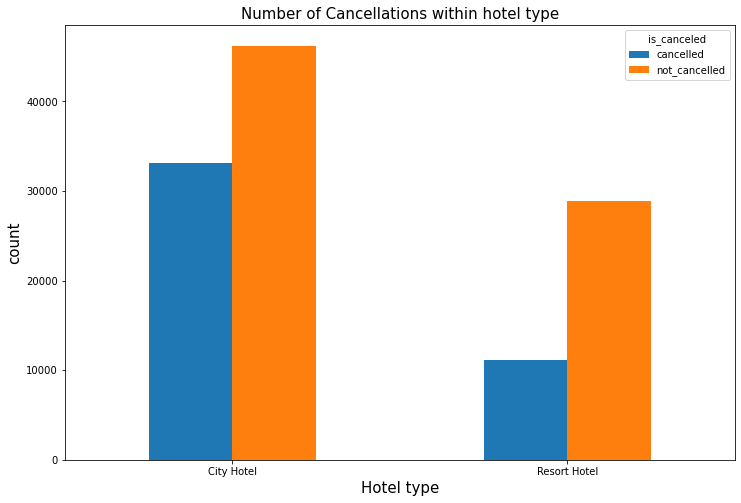

In [74]:
pd.crosstab(df['hotel'],df['is_canceled']).plot(kind='bar')
plt.title('Number of Cancellations within hotel type', fontsize = 15)
plt.xlabel('Hotel type',fontsize = 15)
plt.xticks(rotation = 360)
plt.ylabel('count',fontsize =15)
plt.show()

<font color="green" size=2.8px><b>We can see that there are more number of cancellations in city hotel type compared to resort hotel </b>
    </font>
    
<br>

In [75]:
pd.crosstab(df['hotel'],df['is_canceled'])

is_canceled,cancelled,not_cancelled
hotel,,
City Hotel,33102,46228
Resort Hotel,11122,28938


<font color="blue" size=3px><b>Calling the "chi_square" function to find the dependence of the variables</b>
    </font>

In [76]:
chi_score, degree_f, p = chi_square(df,'hotel','is_canceled')
print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}, p-value: {p}')

is_canceled,cancelled,not_cancelled
hotel,,
City Hotel,33102,46228
Resort Hotel,11122,28938


---Observed (O)---


is_canceled,cancelled,not_cancelled,Total
hotel,,,
City Hotel,33102,46228,79330
Resort Hotel,11122,28938,40060
Total,44224,75166,119390


---Expected (E)---


is_canceled,cancelled,not_cancelled,Total
hotel,,,
City Hotel,29385.123712,49944.876288,79330.0
Resort Hotel,14838.876288,25221.123712,40060.0
Total,44224.000000,75166.000000,119390.0


Critical value for chi-square test: 3.8415
 
---Chi-Square---


is_canceled,cancelled,not_cancelled,Total
hotel,,,
City Hotel,470.141609,276.608340,746.749949
Resort Hotel,931.011828,547.761848,1478.773676
Total,1401.153437,824.370189,2225.523625


Chi2_score: 2225.523625474075, Degrees of freedom: 1, p-value: 0.0


The above output shows that the chi-square test statistic is greater than 3.8415 and the p-value is less than 0.05, thus we reject (i.e. accept) the null hypothesis and conclude that the variables `hotel` and `is_canceled` are not independent.

<font color="blue" size=3px><b>Cancellations per Month</b>
    </font>

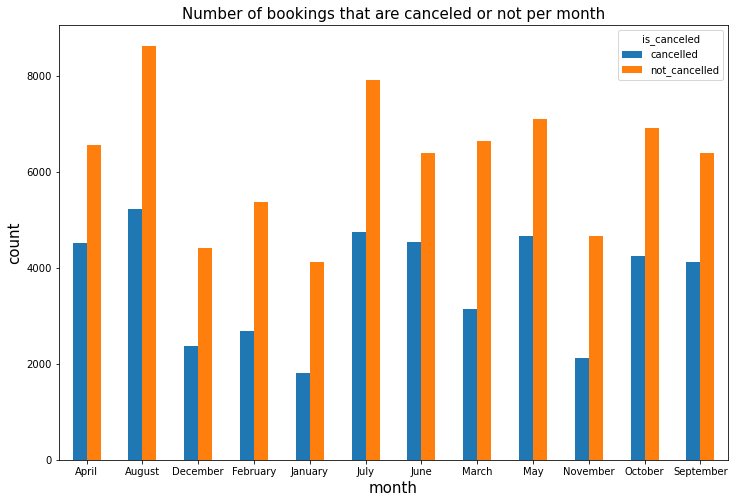

In [77]:
pd.crosstab(df['arrival_date_month'],df['is_canceled']).plot(kind='bar')
plt.title('Number of bookings that are canceled or not per month', fontsize = 15)
plt.xlabel('month',fontsize = 15)
plt.xticks(rotation = 360)
plt.ylabel('count',fontsize =15)
plt.show()

<font color="green" size=2.8px><b>The customers whose arrival month is August are more likely to cancel the bookings. And less cancellations are in January month. </b>
    </font>
    
<br>

<font color="blue" size=3px><b>Calling the "chi_square" function to find the dependence of the variables</b>
    </font>

In [78]:
chi_score, degree_f, p = chi_square(df,'arrival_date_month','is_canceled')
print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}, p-value: {p}')

is_canceled,cancelled,not_cancelled
arrival_date_month,,
April,4524,6565
August,5239,8638
December,2371,4409
February,2696,5372
January,1807,4122
July,4742,7919
June,4535,6404
March,3149,6645
May,4677,7114


---Observed (O)---


is_canceled,cancelled,not_cancelled,Total
arrival_date_month,,,
April,4524,6565,11089
August,5239,8638,13877
December,2371,4409,6780
February,2696,5372,8068
January,1807,4122,5929
July,4742,7919,12661
June,4535,6404,10939
March,3149,6645,9794
May,4677,7114,11791


---Expected (E)---


is_canceled,cancelled,not_cancelled,Total
arrival_date_month,,,
April,4107.546160,6981.453840,11089.0
August,5140.266756,8736.733244,13877.0
December,2511.422397,4268.577603,6780.0
February,2988.518569,5079.481431,8068.0
January,2196.198141,3732.801859,5929.0
July,4689.840556,7971.159444,12661.0
June,4051.983717,6887.016283,10939.0
March,3627.857073,6166.142927,9794.0
May,4367.578390,7423.421610,11791.0


Critical value for chi-square test: 19.6751
 
---Chi-Square---


is_canceled,cancelled,not_cancelled,Total
arrival_date_month,,,
April,42.223214,24.842075,67.065289
August,1.896449,1.115778,3.012227
December,7.851507,4.619443,12.470949
February,28.631950,16.845640,45.477589
January,68.971551,40.579489,109.551040
July,0.580107,0.341306,0.921413
June,57.577904,33.876024,91.453928
March,63.206486,37.187607,100.394092
May,21.921011,12.897251,34.818262


Chi2_score: 588.6917536476618, Degrees of freedom: 11, p-value: 3.6718226093273626e-119


The above output shows that the chi-square test statistic is greater than 19.6751 and the p-value is less than 0.05, thus we reject (i.e. accept) the null hypothesis and conclude that the variables `arrival_date_month` and `is_canceled` are dependent.

<br>

<font color="blue" size=3px><b>Meal vs is_canceled</b>
    </font>

In [79]:
chi_score, degree_f, p = chi_square(df,'meal','is_canceled')
print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}, p-value: {p}')

is_canceled,cancelled,not_cancelled
meal,,
BB,34510,57800
FB,478,320
HB,4984,9479
SC,3966,6684
Undefined,286,883


---Observed (O)---


is_canceled,cancelled,not_cancelled,Total
meal,,,
BB,34510,57800,92310
FB,478,320,798
HB,4984,9479,14463
SC,3966,6684,10650
Undefined,286,883,1169
Total,44224,75166,119390


---Expected (E)---


is_canceled,cancelled,not_cancelled,Total
meal,,,
BB,34193.127063,58116.872937,92310.0
FB,295.592194,502.407806,798.0
HB,5357.330698,9105.669302,14463.0
SC,3944.933412,6705.066588,10650.0
Undefined,433.016635,735.983365,1169.0
Total,44224.000000,75166.000000,119390.0


Critical value for chi-square test: 9.4877
 
---Chi-Square---


is_canceled,cancelled,not_cancelled,Total
meal,,,
BB,2.936510,1.727699,4.664209
FB,112.562539,66.226295,178.788834
HB,26.015906,15.306487,41.322393
SC,0.112499,0.066189,0.178688
Undefined,49.914689,29.367363,79.282053
Total,191.542143,112.694034,304.236177


Chi2_score: 304.23617668200444, Degrees of freedom: 4, p-value: 1.3212351959124216e-64


The above output shows that the chi-square test statistic is greater than 9.4877 and the p-value is less than 0.05, thus we reject (i.e. accept) the null hypothesis and conclude that the variables `meal` and `is_canceled` are dependent.

<br>

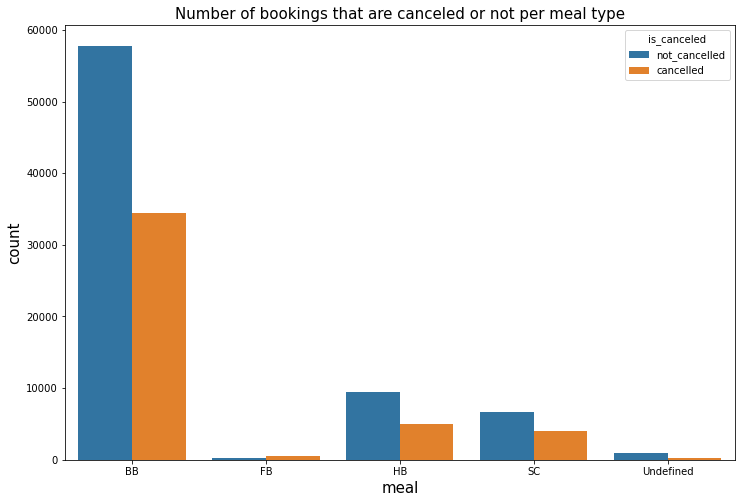

In [80]:
sns.countplot(data=df, x='meal',hue='is_canceled')
plt.title('Number of bookings that are canceled or not per meal type', fontsize = 15)
plt.xlabel('meal',fontsize = 15)
plt.xticks(rotation = 360)
plt.ylabel('count',fontsize =15)
plt.show()

<font color="blue" size=3px><b>Percentage of Cancellations per Country</b>
    </font>

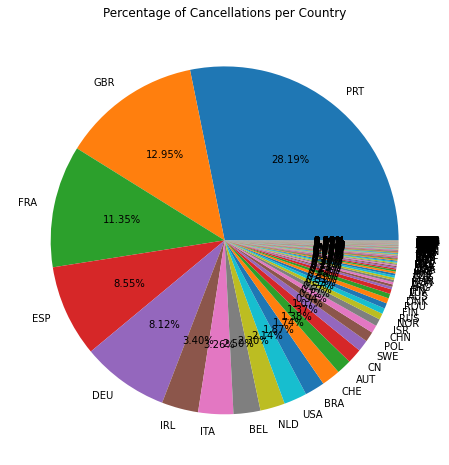

In [81]:
cancelled_per_country = (df[df['is_canceled']=='not_cancelled']['country'].value_counts()/ len(df[df['is_canceled']=='cancelled']) * 100).to_frame().reset_index()
cancelled_per_country.columns = ['country','percentage']
plt.pie(cancelled_per_country['percentage'], labels = cancelled_per_country['country'],autopct='%1.2f%%')
plt.title('Percentage of Cancellations per Country')
plt.show()

<font color="green" size=2.8px><b>We can see from the graph that most of the cancellations are done by customers who belong to Portugal Country</b>
    </font>
    
<br>

<font color="blue" size=3px><b>Checking whether the two variables are independent or not using Chi-square test for Independence</b>
    </font>

In [82]:
chi_score, degree_f, p = chi_square(df,'country','is_canceled')
print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}, p-value: {p}')

is_canceled,cancelled,not_cancelled
country,,
ABW,0,2
AGO,205,157
AIA,0,1
ALB,2,10
AND,5,2
...,...,...
VGB,1,0
VNM,2,6
ZAF,31,49


---Observed (O)---


is_canceled,cancelled,not_cancelled,Total
country,,,
ABW,0,2,2
AGO,205,157,362
AIA,0,1,1
ALB,2,10,12
AND,5,2,7
...,...,...,...
VNM,2,6,8
ZAF,31,49,80
ZMB,1,1,2


---Expected (E)---


is_canceled,cancelled,not_cancelled,Total
country,,,
ABW,0.742746,1.257254,2.0
AGO,134.437049,227.562951,362.0
AIA,0.371373,0.628627,1.0
ALB,4.456477,7.543523,12.0
AND,2.599611,4.400389,7.0
...,...,...,...
VNM,2.970985,5.029015,8.0
ZAF,29.709845,50.290155,80.0
ZMB,0.742746,1.257254,2.0


Critical value for chi-square test: 207.9547
 
---Chi-Square---


is_canceled,cancelled,not_cancelled,Total
country,,,
ABW,0.742746,0.438791,1.181537
AGO,37.036889,21.880232,58.917120
AIA,0.371373,0.219396,0.590769
ALB,1.354047,0.799928,2.153975
AND,2.216433,1.309399,3.525832
...,...,...,...
VNM,0.317340,0.187474,0.504814
ZAF,0.056025,0.033098,0.089123
ZMB,0.089101,0.052638,0.141739


Chi2_score: 15434.681532788676, Degrees of freedom: 176, p-value: 0.0


The above output shows that the chi-square test statistic is greater than 207.9547 and the p-value is less than 0.05, thus we reject (i.e. accept) the null hypothesis and conclude that the variables `country` and `is_canceled` are dependent.

<br>

<font color="blue" size=3px><b>Cancellations per Market Segment</b>
    </font>

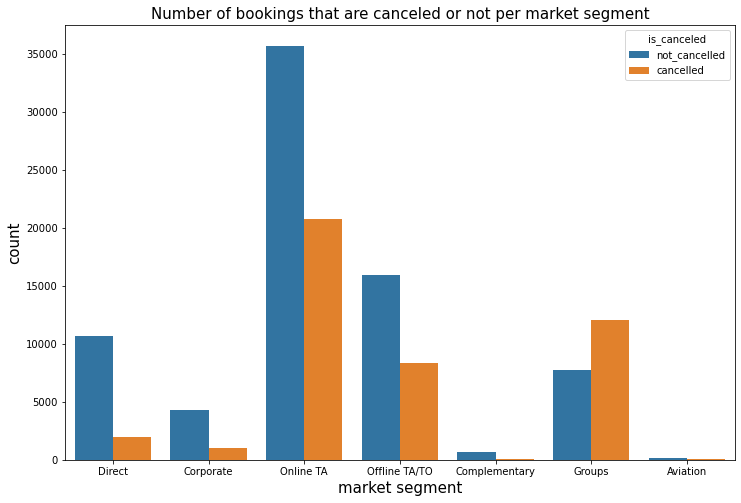

In [83]:
sns.countplot(data=df, x='market_segment',hue='is_canceled')
plt.title('Number of bookings that are canceled or not per market segment', fontsize = 15)
plt.xlabel('market segment',fontsize = 15)
plt.xticks(rotation = 360)
plt.ylabel('count',fontsize =15)
plt.show()

<font color="green" size=2.8px><b>The customers who booked through Online Travel Agencies are more likely to cancel the bookings</b>
    </font>
    
<br>

<font color="blue" size=3px><b>Checking whether the two variables are independent or not using Chi-square test for Independence</b>
    </font>

In [84]:
chi_score, degree_f, p = chi_square(df,'market_segment','is_canceled')
print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}, p-value: {p}')

is_canceled,cancelled,not_cancelled
market_segment,,
Aviation,52,185
Complementary,97,646
Corporate,992,4303
Direct,1934,10672
Groups,12097,7714
Offline TA/TO,8311,15908
Online TA,20741,35738


---Observed (O)---


is_canceled,cancelled,not_cancelled,Total
market_segment,,,
Aviation,52,185,237
Complementary,97,646,743
Corporate,992,4303,5295
Direct,1934,10672,12606
Groups,12097,7714,19811
Offline TA/TO,8311,15908,24219
Online TA,20741,35738,56479
Total,44224,75166,119390


---Expected (E)---


is_canceled,cancelled,not_cancelled,Total
market_segment,,,
Aviation,87.788659,149.211341,237.0
Complementary,275.219298,467.780702,743.0
Corporate,1961.354217,3333.645783,5295.0
Direct,4669.467661,7936.532339,12606.0
Groups,7338.316978,12472.683022,19811.0
Offline TA/TO,8971.111952,15247.888048,24219.0
Online TA,20920.741235,35558.258765,56479.0
Total,44224.000000,75166.000000,119390.0


Critical value for chi-square test: 12.5916
 
---Chi-Square---


is_canceled,cancelled,not_cancelled,Total
market_segment,,,
Aviation,14.589904,8.583986,23.173890
Complementary,115.406581,67.899591,183.306172
Corporate,479.081030,281.867859,760.948889
Direct,1602.491733,942.827800,2545.319532
Groups,3085.866170,1815.572805,4901.438975
Offline TA/TO,48.572328,28.577583,77.149911
Online TA,1.544253,0.908563,2.452816
Total,5347.551998,3146.238187,8493.790185


Chi2_score: 8493.79018456462, Degrees of freedom: 6, p-value: 0.0


The above output shows that the chi-square test statistic is greater than 14.0671 and the p-value is less than 0.05, thus we reject (i.e. accept) the null hypothesis and conclude that the variables `market_segment` and `is_canceled` are dependent.

<br>

<font color="blue" size=3px><b>Cancellations per Distribution Channel</b>
    </font>

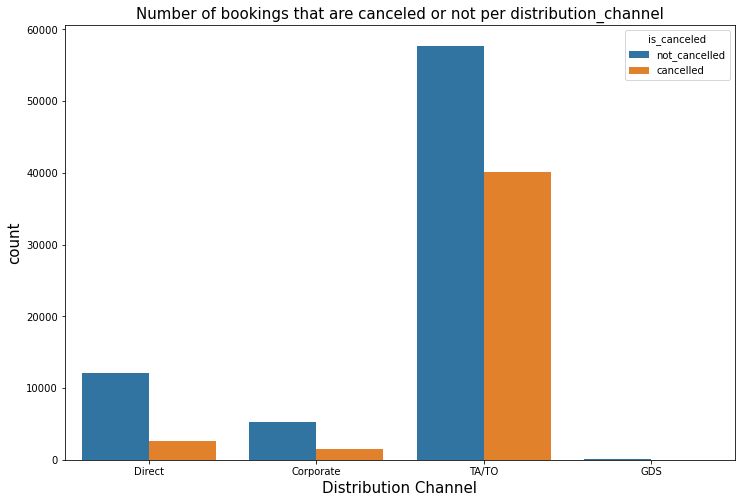

In [85]:
sns.countplot(data=df, x='distribution_channel',hue='is_canceled')
plt.title('Number of bookings that are canceled or not per distribution_channel', fontsize = 15)
plt.xlabel('Distribution Channel',fontsize = 15)
plt.xticks(rotation = 360)
plt.ylabel('count',fontsize =15)
plt.show()

<font color="green" size=2.8px><b>The customers who booked through Travel Agencies distribution channel are more likely to cancel the bookings</b>
    </font>
    
<br>

<font color="blue" size=3px><b>Checking whether the two variables are independent or not using Chi-square test for Independence</b>
    </font>

In [86]:
chi_score, degree_f, p = chi_square(df,'distribution_channel','is_canceled')
print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}, p-value: {p}')

is_canceled,cancelled,not_cancelled
distribution_channel,,
Corporate,1474,5203
Direct,2557,12088
GDS,37,156
TA/TO,40156,57719


---Observed (O)---


is_canceled,cancelled,not_cancelled,Total
distribution_channel,,,
Corporate,1474,5203,6677
Direct,2557,12088,14645
GDS,37,156,193
TA/TO,40156,57719,97875
Total,44224,75166,119390


---Expected (E)---


is_canceled,cancelled,not_cancelled,Total
distribution_channel,,,
Corporate,2473.269520,4203.730480,6677.0
Direct,5424.746461,9220.253539,14645.0
GDS,71.490343,121.509657,193.0
TA/TO,36254.493676,61620.506324,97875.0
Total,44224.000000,75166.000000,119390.0


Critical value for chi-square test: 7.8147
 
---Chi-Square---


is_canceled,cancelled,not_cancelled,Total
distribution_channel,,,
Corporate,403.732616,237.536535,641.269151
Direct,1516.009978,891.946163,2407.956141
GDS,16.639782,9.790034,26.429817
TA/TO,419.858342,247.024124,666.882466
Total,2356.240718,1386.296857,3742.537575


Chi2_score: 3742.5375752422306, Degrees of freedom: 3, p-value: 0.0


The above output shows that the chi-square test statistic is greater than 9.4877 and the p-value is less than 0.05, thus we reject (i.e. accept) the null hypothesis and conclude that the variables `distribution_channel` and `is_canceled` are dependent.

<br>

<font color="blue" size=3px><b>Cancellations per Reserved Room type</b>
    </font>

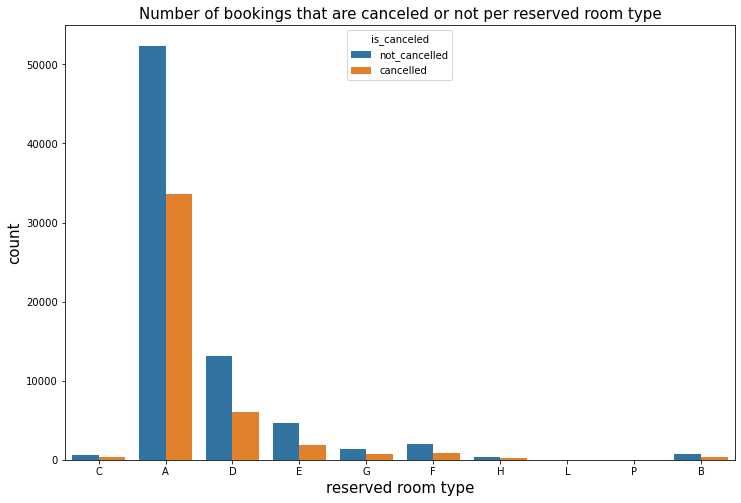

In [87]:
sns.countplot(data=df, x='reserved_room_type',hue='is_canceled')
plt.title('Number of bookings that are canceled or not per reserved room type', fontsize = 15)
plt.xlabel('reserved room type',fontsize = 15)
plt.xticks(rotation = 360)
plt.ylabel('count',fontsize =15)
plt.show()

<font color="green" size=2.8px><b>There are more number of customers who reserved A room type and also more number of cancellations are done by customers who reserved A room type </b>
    </font>
    
<br>

<font color="blue" size=3px><b>Checking whether the two variables are independent or not using Chi-square test for Independence</b>
    </font>

In [88]:
chi_score, degree_f, p = chi_square(df,'reserved_room_type','is_canceled')
print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}, p-value: {p}')

is_canceled,cancelled,not_cancelled
reserved_room_type,,
A,33630,52364
B,368,750
C,308,624
D,6102,13099
E,1914,4621
F,880,2017
G,763,1331
H,245,356
L,2,4


---Observed (O)---


is_canceled,cancelled,not_cancelled,Total
reserved_room_type,,,
A,33630,52364,85994
B,368,750,1118
C,308,624,932
D,6102,13099,19201
E,1914,4621,6535
F,880,2017,2897
G,763,1331,2094
H,245,356,601
L,2,4,6


---Expected (E)---


is_canceled,cancelled,not_cancelled,Total
reserved_room_type,,,
A,31853.577821,54140.422179,85994.0
B,414.125404,703.874596,1118.0
C,345.227976,586.772024,932.0
D,7112.363045,12088.636955,19201.0
E,2420.670408,4114.329592,6535.0
F,1073.095971,1823.904029,2897.0
G,775.651696,1318.348304,2094.0
H,222.620186,378.379814,601.0
L,2.222498,3.777502,6.0


Critical value for chi-square test: 16.919
 
---Chi-Square---


is_canceled,cancelled,not_cancelled,Total
reserved_room_type,,,
A,99.068173,58.286870,157.355043
B,5.137461,3.022631,8.160091
C,4.014513,2.361943,6.376456
D,143.529440,84.445706,227.975146
E,106.051159,62.395318,168.446477
F,34.746244,20.442991,55.189235
G,0.206362,0.121414,0.327776
H,2.249823,1.323686,3.573509
L,0.022275,0.013105,0.035380


Chi2_score: 647.8350973363271, Degrees of freedom: 9, p-value: 1.121956218424043e-133


The above output shows that the chi-square test statistic is greater than 16.919 and the p-value is less than 0.05, thus we reject (i.e. accept) the null hypothesis and conclude that the variables `reserved_room_type` and `is_canceled` are dependent.

<br>

<font color="blue" size=3px><b>Cancellations per Customer Type</b>
    </font>

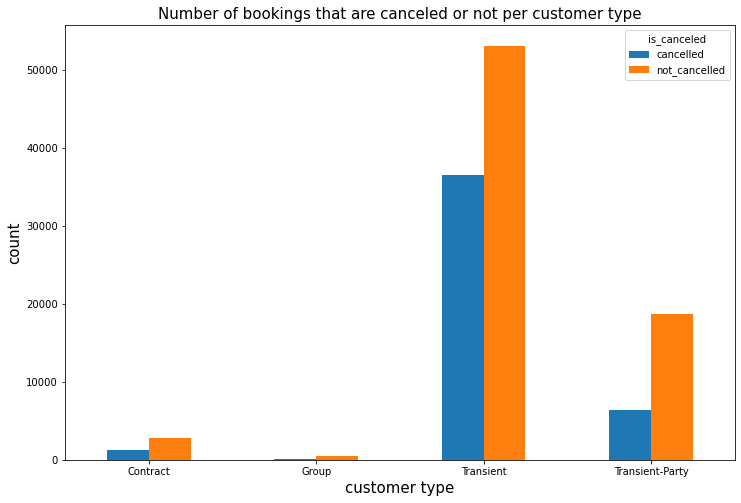

In [89]:
pd.crosstab(df['customer_type'],df['is_canceled']).plot(kind='bar')
plt.title('Number of bookings that are canceled or not per customer type', fontsize = 15)
plt.xlabel('customer type',fontsize = 15)
plt.xticks(rotation = 360)
plt.ylabel('count',fontsize =15)
plt.show()

<font color="green" size=2.8px><b>There are more number of cancellations from Transient customer type</b>
    </font>
    
<br>

In [90]:
chi_score, degree_f, p = chi_square(df,'customer_type','is_canceled')
print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}, p-value: {p}')

is_canceled,cancelled,not_cancelled
customer_type,,
Contract,1262,2814
Group,59,518
Transient,36514,53099
Transient-Party,6389,18735


---Observed (O)---


is_canceled,cancelled,not_cancelled,Total
customer_type,,,
Contract,1262,2814,4076
Group,59,518,577
Transient,36514,53099,89613
Transient-Party,6389,18735,25124
Total,44224,75166,119390


---Expected (E)---


is_canceled,cancelled,not_cancelled,Total
customer_type,,,
Contract,1509.816769,2566.183231,4076.0
Group,213.730195,363.269805,577.0
Transient,33194.114348,56418.885652,89613.0
Transient-Party,9306.338688,15817.661312,25124.0
Total,44224.000000,75166.000000,119390.0


Critical value for chi-square test: 7.8147
 
---Chi-Square---


is_canceled,cancelled,not_cancelled,Total
customer_type,,,
Contract,40.675897,23.931709,64.607606
Group,112.017084,65.905377,177.922461
Transient,332.035994,195.353748,527.389741
Transient-Party,914.523456,538.060896,1452.584353
Total,1399.252431,823.251730,2222.504160


Chi2_score: 2222.50416048372, Degrees of freedom: 3, p-value: 0.0


The above output shows that the chi-square test statistic is greater than 7.8147 and the p-value is less than 0.05, thus we reject (i.e. accept) the null hypothesis and conclude that the variables `customer_type` and `is_canceled` are dependent.

<br>

<font color="blue" size=3px><b>Cancellations per Reservation Status</b>
    </font>

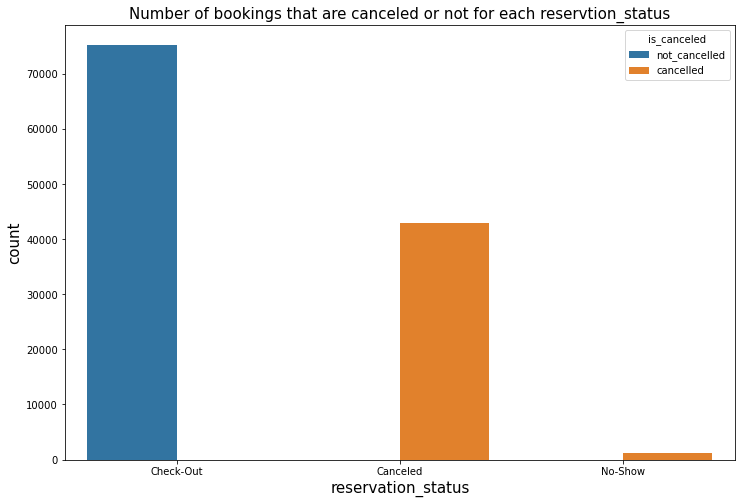

In [91]:
sns.countplot(data=df, x='reservation_status',hue='is_canceled')
plt.title('Number of bookings that are canceled or not for each reservtion_status', fontsize = 15)
plt.xlabel('reservation_status',fontsize = 15)
plt.xticks(rotation = 360)
plt.ylabel('count',fontsize =15)
plt.show()

<font color="red" size=3px><b>Numerical columns vs Target Variable</b>
    </font></b>
    </font>

In [92]:
df.select_dtypes(include='number').columns

Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'lead_time_month',
       'is_previously_cancelled', 'is_booking_changed'],
      dtype='object')

##### Performing 2- sample independent test to check whether there is any significant differences between the means of the values of the numeric variables for each categorical value.

Null Hypothesis(H0) : Numerical variable and Target variable are independent.<br>
Alternate Hypothesis(H1) : Numerical variable and Target variable are dependent.<br>

If P-value is less than 0.05, then we reject Null Hypothesis.

In [93]:
for i in df.select_dtypes(include='number'):
    target_0 = df[df['is_canceled']=='not_cancelled'][i]
    target_1 = df[df['is_canceled']=='cancelled'][i]
    test_statistic,p_value = stats.ttest_ind(target_0, target_1)
    print(f'P-value for {i} and target variable is: ', p_value)

P-value for lead_time and target variable is:  0.0
P-value for arrival_date_year and target variable is:  8.572485641974299e-09
P-value for arrival_date_week_number and target variable is:  0.004871553640506461
P-value for arrival_date_day_of_month and target variable is:  0.03416531503782533
P-value for stays_in_weekend_nights and target variable is:  0.5360068239267273
P-value for stays_in_week_nights and target variable is:  1.1473295419096583e-17
P-value for adults and target variable is:  1.0785654471970126e-95
P-value for children and target variable is:  nan
P-value for babies and target variable is:  2.923023512894362e-29
P-value for is_repeated_guest and target variable is:  2.3127064757460676e-189
P-value for previous_cancellations and target variable is:  0.0
P-value for previous_bookings_not_canceled and target variable is:  1.4894651919888033e-87
P-value for booking_changes and target variable is:  0.0
P-value for agent and target variable is:  nan
P-value for company and 

1. We can see that P-value for ['stays_in_weekend_nights'] and target variable is greater than 0.05, hence we fail to reject Null Hypothesis, concluding that this variable is not significant for model.
2. P-values for['children','agent','company'] is nan because there are null values in the respective column.
3. We will further visualize using differnt plots to check whether the variables are correlated or not

<font color="blue" size=3px><b>Leadtime and Cancellation</b>
    </font></b>
    </font>

<AxesSubplot:xlabel='is_canceled', ylabel='lead_time_month'>

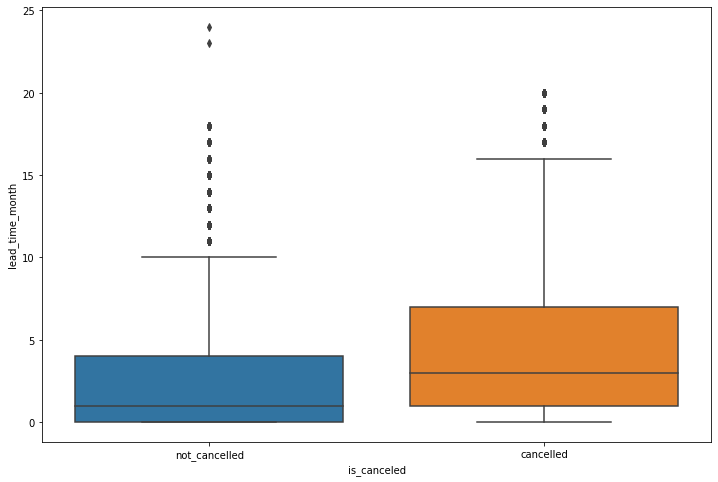

In [94]:
sns.boxplot(data=df, y='lead_time_month',x='is_canceled')

In [95]:
df.groupby('is_canceled')['lead_time'].mean()

is_canceled
cancelled        144.848815
not_cancelled     79.984687
Name: lead_time, dtype: float64

In [96]:
pd.crosstab(df['lead_time_month'], df['is_canceled'], normalize = 'index')

is_canceled,cancelled,not_cancelled
lead_time_month,,
0,0.182459,0.817541
1,0.363404,0.636596
2,0.397375,0.602625
3,0.440382,0.559618
4,0.435967,0.564033
5,0.462025,0.537975
6,0.447258,0.552742
7,0.469215,0.530785
8,0.551453,0.448547


<font color="green" size=2.8px><b>Maximum cancelations occur if the booking are made 60-70 days before the checkin date. Longer the lead_time, lower is the cancelation.From the crosstab below we see that leadtime in general has a linear effect towards cancellation it means in general that the longer lead time has a higher cancellation rate compared to the shorter one 
bookings that has more than 7 months lead time are more likely to be canceled compared to confirmed</b>
    </font>
    
<br>

<font color="blue" size=3px><b>Children, babies and Cancellations</b>
    </font></b>
    </font>

In [97]:
((len(df.loc[(df['children']!=0) | (df['babies']!=0)]))/(len(df))) * 100

7.819750397855767

The number of customers having children or babies or both are only 8% of the total population. Therefore this information can be ignored as it will not play a significant role in deciding whether to cancel the booking or not.

<font color="blue" size=3px><b>Repeated Guest and Cancellation</b>
    </font>

In [98]:
df['is_repeated_guest'].unique()

array([0, 1], dtype=int64)

We can see that 'is_repeated_guest' contains only 2 unique values 0 and 1, so plotting boxplot is meaningless. So we consider this varaible as categorical and plot against target variable

<AxesSubplot:xlabel='is_repeated_guest', ylabel='count'>

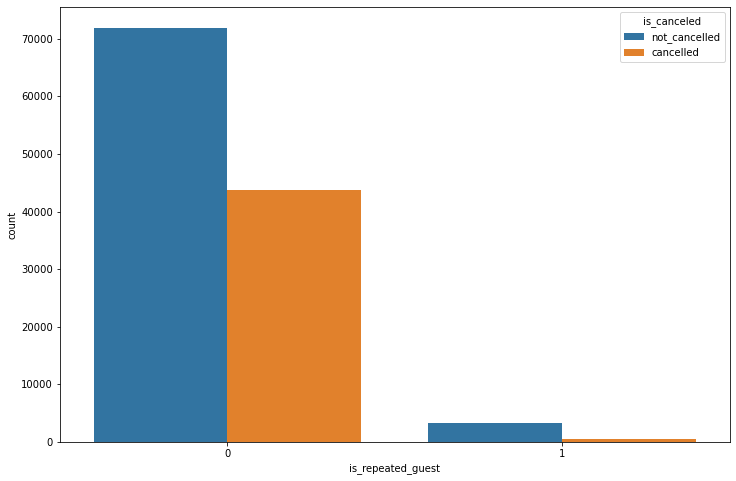

In [99]:
sns.countplot(data=df, x='is_repeated_guest', hue='is_canceled')

<font color="green" size=2.8px><b>As seen in the correlation table, the above graph bolsters the evidence that maximum customers are new comers and they are less likely to cancel their current booking. Old guests are less likely to cancel the booking (14%).</b>
    </font>
    
<br>

<font color="blue" size=3px><b>Previous Cancellations and Cancellations</b>
    </font>

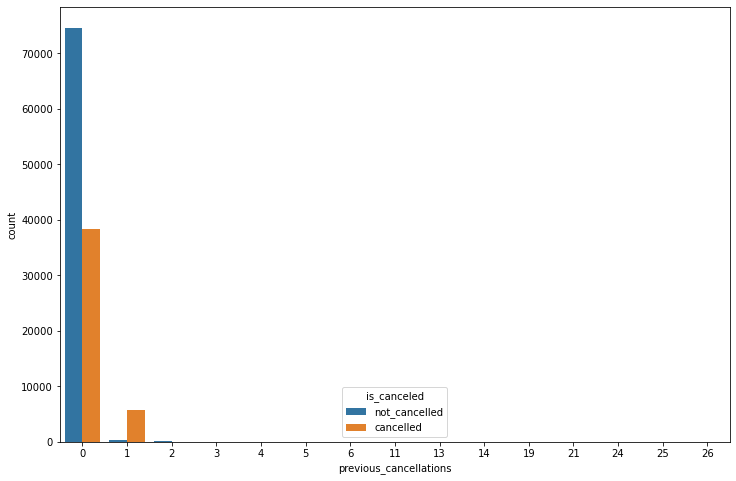

In [100]:
sns.countplot(data=df, x='previous_cancellations', hue='is_canceled')
plt.show()

<font color="green" size=2.8px><b>Maximum customers have 0 previous cancellations. They are less likely to cancel the current booking. However, customers who have cancelled once earlier are more likely to cancel the current booking. This also matches with the positive correlation between previous_cancellations and is_cancelled.</b>
    </font>
    
<br>

<font color="blue" size=3px><b>Special Requests and Cancellation</b>
    </font>

In [101]:
pd.crosstab(df['total_of_special_requests'], df['is_canceled'], normalize = 'index')

is_canceled,cancelled,not_cancelled
total_of_special_requests,,
0,0.477204,0.522796
1,0.220249,0.779751
2,0.220989,0.779011
3,0.178614,0.821386
4,0.105882,0.894118
5,0.050000,0.950000


<AxesSubplot:xlabel='is_canceled', ylabel='total_of_special_requests'>

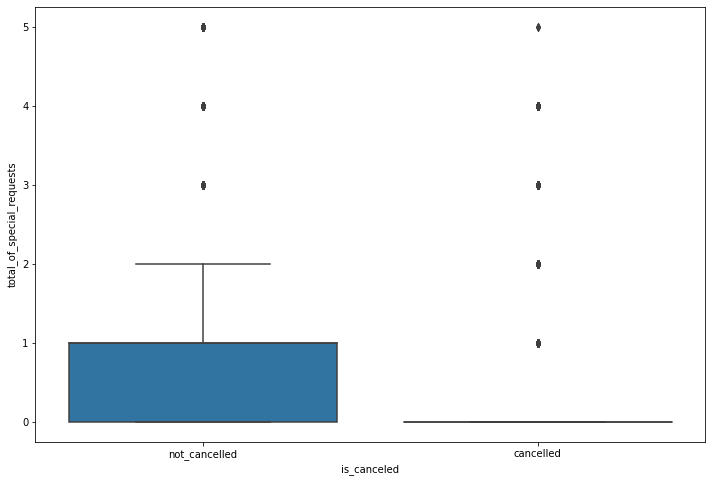

In [102]:
sns.boxplot(y=df['total_of_special_requests'],x=df['is_canceled'])

<font color="green" size=2.8px><b>The numbers of special request has a negative correlation  with cancellation we see that the higher the number of the total special request the lower the cancellation rate, means here that customers who booked and requested a lot of stuff are more like like not to canceled compared to customer who did not have special requests .</b>
    </font>
    
<br>

<font color="blue" size=3px><b>Arrival Date Year and Cancellation</b>
    </font>

Although 'arrival_date_year' is a numeircal variable, it contains the years which cannot be considered as numerical. so we consider this variable as categorical column and check the relationship with the target variable

In [103]:
pd.crosstab(df['arrival_date_year'], df['is_canceled'], normalize = 'index')

is_canceled,cancelled,not_cancelled
arrival_date_year,,
2015,0.370158,0.629842
2016,0.358633,0.641367
2017,0.386979,0.613021


<AxesSubplot:xlabel='arrival_date_year', ylabel='count'>

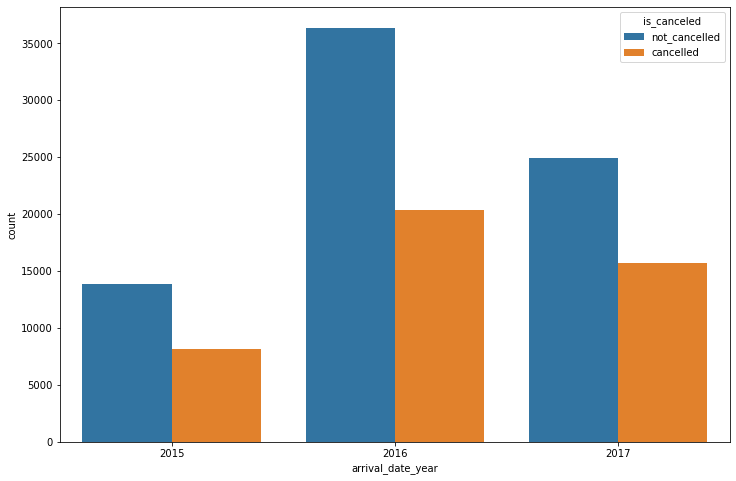

In [104]:
sns.countplot(df['arrival_date_year'],hue=df['is_canceled'])

<font color="green" size=2.8px><b>The cancellation rate goes down about 1.2 % from in 2016 however the cancellation rate goes up 1.9 % in 2017 to 38. 7 %.</b>
    </font>
    
<br>

<font color="blue" size=3px><b>Booking Changes and Cancellation</b>
    </font>

pd.crosstab(df['is_booking_changed'], df['is_canceled'], normalize = 'index')

<AxesSubplot:xlabel='is_booking_changed', ylabel='count'>

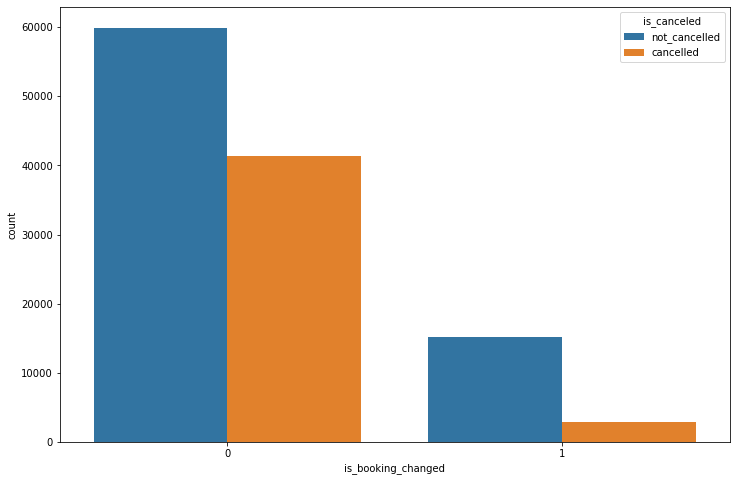

In [105]:
sns.countplot(df['is_booking_changed'],hue=df['is_canceled'])

<font color="green" size=2.8px><b>Booking that has changes are less likely to be cancelled compared to the booking that's never been changed(original booking).</b>
    </font>
    
<br>

<font color="blue" size=3px><b>Parking Spaces and Cancellation</b>
    </font>

In [106]:
pd.crosstab(df['required_car_parking_spaces'], df['is_canceled'], normalize='index')

is_canceled,cancelled,not_cancelled
required_car_parking_spaces,,
0,0.394949,0.605051
1,0.000000,1.000000
2,0.000000,1.000000
3,0.000000,1.000000
8,0.000000,1.000000


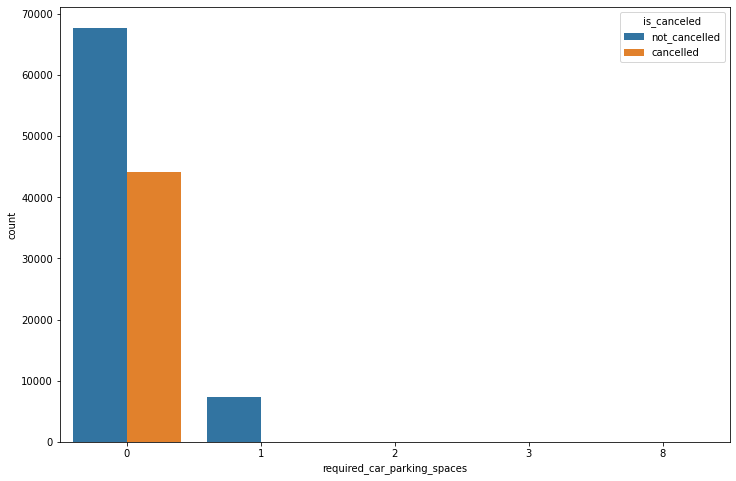

In [107]:
sns.countplot(df['required_car_parking_spaces'],hue=df['is_canceled'])
plt.show()

<font color="green" size=2.8px><b>Here shows that customer who need a parking spot for their vehicle actually never cancelled their hotel booking. Since there're no cancellation for people who drives to the hotel attracting more of them is not a bad idea at all</b>
    </font>

In [108]:
parking=[]
for i in df['required_car_parking_spaces']:
    if i<1:
        parking.append(0)
    else:
        parking.append(1)
df['parking_space_required'] = parking

<font color="blue" size=3px><b>Reserved Room Type, Assigned Room Type and Cancellations</b>
    </font>

1. Reserved Room Type is what customers preferred during the booking. 
2. Assigned Room Type is what customers was assigned after the booking confirmation.
3. Now, if the customers didnt get assigned their reserved room type, there may be a chance of cancellation of bookings.
4. We will create a seperate column which contains values '1' if reserved room type is equal to assigned room type else '0'.
5. Then we will visualize the feature effects the cancellation or not

In [109]:
df['is_sameroom_assigned'] = (df['reserved_room_type']==df['assigned_room_type']).astype(int)

In [110]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,country_location,lead_time_month,is_previously_cancelled,is_booking_changed,parking_space_required,is_sameroom_assigned
0,Resort Hotel,not_cancelled,342,2015,July,27,1,0,0,2,...,0,0,Check-Out,2015-07-01,International,11,0,1,0,1
1,Resort Hotel,not_cancelled,737,2015,July,27,1,0,0,2,...,0,0,Check-Out,2015-07-01,International,24,0,1,0,1
2,Resort Hotel,not_cancelled,7,2015,July,27,1,0,1,1,...,0,0,Check-Out,2015-07-02,International,0,0,0,0,0
3,Resort Hotel,not_cancelled,13,2015,July,27,1,0,1,1,...,0,0,Check-Out,2015-07-02,International,0,0,0,0,1
4,Resort Hotel,not_cancelled,14,2015,July,27,1,0,2,2,...,0,1,Check-Out,2015-07-03,International,0,0,0,0,1


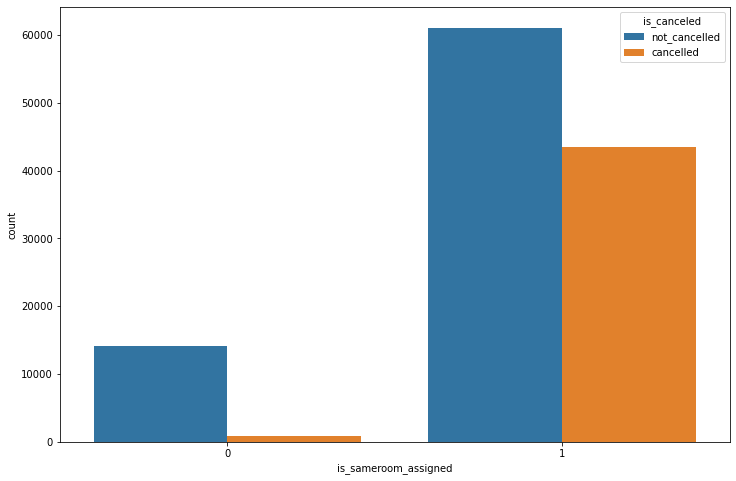

In [111]:
sns.countplot(df['is_sameroom_assigned'],hue=df['is_canceled'])
plt.show()

<font color="green" size=2.8px><b>We can see that even though the customers where assigned their respective reserved room type, there are more cancellations than the other group</b>
    </font>
<br>

<font color="red" size=5px><b>Data Preprocessing</b>
    </font></b>
    </font>

<font color="red" size=3.5px><b>Detecting Null Values and Treating them</b>
    </font></b>
    </font>

In [112]:
df.isnull().sum()/len(df)*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

<font color="green" size=2.8px><b>1. There are 4 columns with null/missing values in the dataset.<br><br>
    a) The "children" feature consists of 0.3% percent of null values. So, we drop the null values or fill the null values with zero.As the "children" contains number of childrens per booking, the given datatype is float. We can convert the datatype to integer.
    <br>
    <br>
    b) The "country" feature consists of 4% of null values. So, we drop the null values or fill the null values with the country that has highest frequency.In this case, we are going to impute null values with the mode of "country" feature.
 <br>
    <br>
    c) The "agent" feature consists of 13.7% of null values. That means 13.7% customers booked without any help of any agent i.e booked the hotel by themselves. As the "agent" feature contains id of agent, we can fill null values with "0" or we can drop the column..As the "agent" contains id of the agent, the given datatype is float. We can convert the datatype to integer.
  <br>
    <br>
    d) The "company" consists of 94% of null values. That means the some of the agents belongs to these companies and some may not belong to these companies. As most of the values in the company column is missing, we can drop the column. </b>
    </font>
    
<br>

In [113]:
df['children'] = df['children'].fillna(0)

In [114]:
df['children'] = df['children'].astype('int64')

In [115]:
df['country'] = df['country'].fillna(df['country'].value_counts().index[0])

In [116]:
df['agent'] = df['agent'].fillna(0)

In [117]:
df['agent'] = df['agent'].astype('int64')

In [118]:
df = df.drop('company',axis=1)

In [119]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,country_location,lead_time_month,is_previously_cancelled,is_booking_changed,parking_space_required,is_sameroom_assigned
0,Resort Hotel,not_cancelled,342,2015,July,27,1,0,0,2,...,0,0,Check-Out,2015-07-01,International,11,0,1,0,1
1,Resort Hotel,not_cancelled,737,2015,July,27,1,0,0,2,...,0,0,Check-Out,2015-07-01,International,24,0,1,0,1
2,Resort Hotel,not_cancelled,7,2015,July,27,1,0,1,1,...,0,0,Check-Out,2015-07-02,International,0,0,0,0,0
3,Resort Hotel,not_cancelled,13,2015,July,27,1,0,1,1,...,0,0,Check-Out,2015-07-02,International,0,0,0,0,1
4,Resort Hotel,not_cancelled,14,2015,July,27,1,0,2,2,...,0,1,Check-Out,2015-07-03,International,0,0,0,0,1


<font color="red" size=3.5px><b>Detecting Outliers</b>
    </font></b>
    </font>

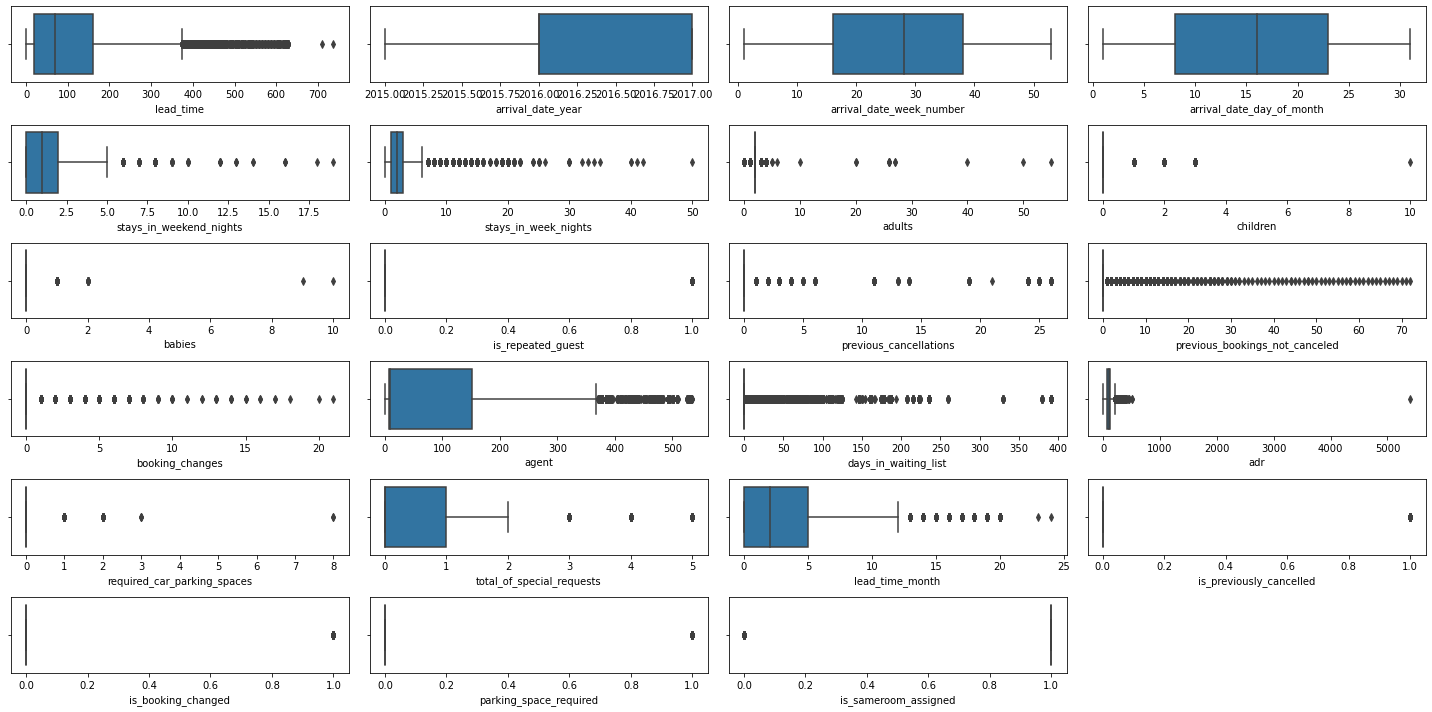

In [120]:
plt.figure(figsize = (20, 10))
x = 1 

for column in df.describe().columns:
    plt.subplot(6,4,x)
    sns.boxplot(df[column])
    x+=1
    
plt.tight_layout()

<font color="green" size=2.8px><b>
    a) We can see that there are many outliers in many of the columns.
    <br>
    <br>
    b) We will handle the outliers by binning the columns that has outliers in it
 <br>
    <br>
    c) and from the box plot there are columns that has a random value like 0 number of adults and negative amount of adr </b>
    </font>
    
<br>

In [121]:
df['arrival_date'] = df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'] + '-' + df['arrival_date_day_of_month'].astype(str)
df['arrival_date'] = pd.to_datetime(df['arrival_date'])

In [122]:
df['arrival_day'] = df['arrival_date'].dt.day_name()
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reservation_status,reservation_status_date,country_location,lead_time_month,is_previously_cancelled,is_booking_changed,parking_space_required,is_sameroom_assigned,arrival_date,arrival_day
0,Resort Hotel,not_cancelled,342,2015,July,27,1,0,0,2,...,Check-Out,2015-07-01,International,11,0,1,0,1,2015-07-01,Wednesday
1,Resort Hotel,not_cancelled,737,2015,July,27,1,0,0,2,...,Check-Out,2015-07-01,International,24,0,1,0,1,2015-07-01,Wednesday
2,Resort Hotel,not_cancelled,7,2015,July,27,1,0,1,1,...,Check-Out,2015-07-02,International,0,0,0,0,0,2015-07-01,Wednesday
3,Resort Hotel,not_cancelled,13,2015,July,27,1,0,1,1,...,Check-Out,2015-07-02,International,0,0,0,0,1,2015-07-01,Wednesday
4,Resort Hotel,not_cancelled,14,2015,July,27,1,0,2,2,...,Check-Out,2015-07-03,International,0,0,0,0,1,2015-07-01,Wednesday


In [123]:
df['reservation_status_date'] = df['reservation_status_date'].apply(pd.to_datetime)

In [124]:
df.shape

(119390, 39)

In [125]:
df.drop(labels = df[df['adults'] == 0].index, axis = 0, inplace = True)
df[df['adults'] == 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reservation_status,reservation_status_date,country_location,lead_time_month,is_previously_cancelled,is_booking_changed,parking_space_required,is_sameroom_assigned,arrival_date,arrival_day


In [126]:
df = df.drop(df[df.adr < 0].index)
df[df['adr'] < 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reservation_status,reservation_status_date,country_location,lead_time_month,is_previously_cancelled,is_booking_changed,parking_space_required,is_sameroom_assigned,arrival_date,arrival_day


In [127]:
df = df.drop(df[df.adr > 5000].index)
df[df['adr']> 5000]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reservation_status,reservation_status_date,country_location,lead_time_month,is_previously_cancelled,is_booking_changed,parking_space_required,is_sameroom_assigned,arrival_date,arrival_day


In [128]:
df['total_stays'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

In [129]:
df['guests'] = df['adults'] + df['children'] + df['babies']

In [130]:
df['kids'] = df['children'] + df['babies']

In [131]:
df['meal'] = df['meal'].str.replace('Undefined', 'SC')
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

In [132]:
df.shape

(118985, 42)

In [133]:
df['is_canceled'].value_counts()

not_cancelled    74871
cancelled        44114
Name: is_canceled, dtype: int64

In [134]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'country_location',
       'lead_time_month', 'is_previously_cancelled', 'is_booking_changed',
       'parking_space_required', 'is_sameroom_assigned', 'arrival_date',
       'arrival_day', 'total_stays', 'guests', 'kids'],
      dtype='object')

<font color="red" size=4px><b>Dropping columns that are rebundant</b>
    </font></b>
    </font>

In [135]:
df_copy = df.drop(['lead_time','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights',
                  'adults','children','babies','country','previous_cancellations','previous_bookings_not_canceled',
                  'booking_changes','agent','required_car_parking_spaces','reservation_status_date','reservation_status','kids','arrival_date'],axis=1)

In [136]:
df_copy.columns

Index(['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month',
       'meal', 'market_segment', 'distribution_channel', 'is_repeated_guest',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'total_of_special_requests', 'country_location', 'lead_time_month',
       'is_previously_cancelled', 'is_booking_changed',
       'parking_space_required', 'is_sameroom_assigned', 'arrival_day',
       'total_stays', 'guests'],
      dtype='object')

<font color="red" size=4px><b>Splitting the data into train and test sets</b>
    </font></b>
    </font>

In [137]:
df_copy['is_canceled'].unique()

array(['not_cancelled', 'cancelled'], dtype=object)

replacing 'cancelled' with 1 and 'not_cancelled' with 0

In [138]:
is_canceled = []
for i in df_copy['is_canceled']:
    if i == 'not_cancelled':
        is_canceled.append(0)
    else:
        is_canceled.append(1)

In [139]:
df_copy['is_canceled'] = is_canceled
df_copy['is_canceled'] = df_copy['is_canceled'].astype('int64')

In [140]:
df_copy['is_canceled'].unique()

array([0, 1], dtype=int64)

In [141]:
X = df_copy.drop('is_canceled',axis=1)
Y = df_copy['is_canceled']

In [142]:
df_cat = X.select_dtypes(include='O')
df_cat = pd.get_dummies(df_cat, drop_first=True)

In [143]:
df_num = X.select_dtypes(include='number')

In [144]:
X = pd.concat([df_num, df_cat], axis = 1)

In [145]:
X.shape

(118985, 65)

In [146]:
Y.shape

(118985,)

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 10, test_size = 0.2)

In [148]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (95188, 65)
y_train (95188,)
X_test (23797, 65)
y_test (23797,)


<font color="red" size=5px><b>Logistic Regression</b>
    </font></b>
    </font>

In [149]:
from sklearn.linear_model import LogisticRegression

In [150]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression()

In [151]:
logreg.score(X_train, y_train)

0.7920326091524141

In [152]:
logreg.score(X_test, y_test)

0.7946800016808842

Insight: No overfitting detected. The ML algo is able to reproduce the patterns on the test set that it has learnt on the training set.

In [154]:
y_pred = logreg.predict(X_test)

<AxesSubplot:>

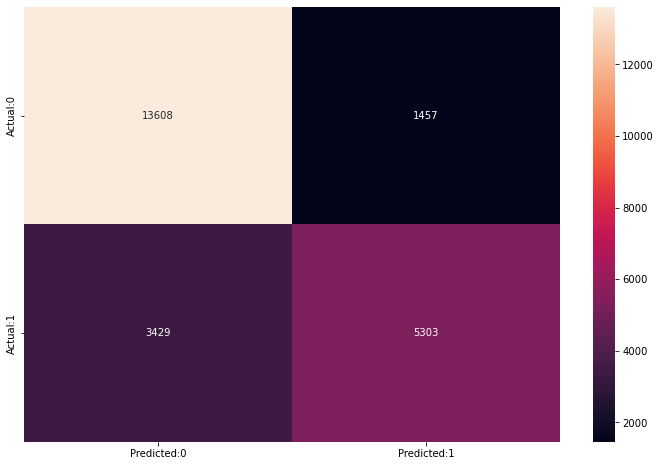

In [155]:
cm = confusion_matrix(y_test, y_pred)
con_mat = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index = ['Actual:0', 'Actual:1'])
sns.heatmap(con_mat, annot = True, fmt = 'd')

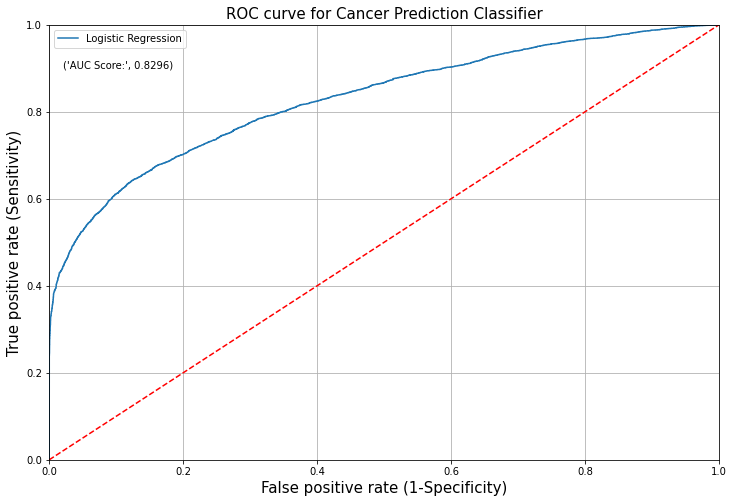

In [156]:
y_scores = logreg.predict_proba(X_test)
y_scores=y_scores[:, 1]
fpr, tpr, th = roc_curve(y_test, y_scores)
plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1], 'r--')
plt.title('ROC curve for Cancer Prediction Classifier', fontsize =15)
plt.xlabel('False positive rate (1-Specificity)', fontsize=15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x=0.02, y=0.9, s=('AUC Score:', round(roc_auc_score(y_test, y_scores),4)))
plt.grid(True)
plt.legend()
plt.show()


##### Create a dataframe to store the metrics of all the models

In [157]:
score_card = pd.DataFrame()
score_card['Metrics'] = ['AUC Score', 'Precision Score','Recall Score','Accuracy Score', 'Kappa Score', 'f1-score']
score_card.set_index('Metrics', inplace=True)

In [158]:
score_card_Tuned = pd.DataFrame()
score_card_Tuned['Metrics'] = ['AUC Score', 'Precision Score','Recall Score','Accuracy Score', 'Kappa Score', 'f1-score']
score_card_Tuned.set_index('Metrics', inplace=True)

In [163]:
acc_train_and_test=pd.DataFrame()
acc_train_and_test['set'] = ['training','testing']
acc_train_and_test.set_index('set',inplace=True)

In [164]:
acc_tuned_train_and_test=pd.DataFrame()
acc_tuned_train_and_test['set'] = ['training','testing']
acc_tuned_train_and_test.set_index('set',inplace=True)

In [161]:
score_card['Logistic Regression'] = [roc_auc_score(y_test, y_pred),precision_score(y_test,y_pred), recall_score(y_test, y_pred),
                              accuracy_score(y_test, y_pred), cohen_kappa_score(y_test, y_pred), f1_score(y_test, y_pred)]
score_card

,Logistic Regression
Metrics,
AUC Score,0.755296
Precision Score,0.784467
Recall Score,0.607306
Accuracy Score,0.794680
Kappa Score,0.536037
f1-score,0.684611


In [165]:
acc_train_and_test['Logistic Regression']=[logreg.score(X_train,y_train),logreg.score(X_test,y_test)]
acc_train_and_test

,Logistic Regression
set,
training,0.792033
testing,0.794680


## Tuned Logistic Regression

In [173]:
param_grid = {'penalty':['l1', 'l2', 'elasticnet'], 
          'class_weight' : ['balanced'], 
           'max_iter': [100, 1000], 
           'solver': ['lbfgs', 'saga']}

In [174]:
grid = GridSearchCV(LogisticRegression(), param_grid)

In [175]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'class_weight': ['balanced'], 'max_iter': [100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'saga']})

In [176]:
grid.best_params_

{'class_weight': 'balanced',
 'max_iter': 1000,
 'penalty': 'l2',
 'solver': 'lbfgs'}

In [177]:
class_weight: 'balanced'
max_iter: 1000
penalty: 'l2'
solver: 'lbfgs'

In [178]:
best_logreg = grid.best_estimator_

In [179]:
best_logreg

LogisticRegression(class_weight='balanced', max_iter=1000)

In [180]:
y_pred_best = best_logreg.predict(X_test)

In [181]:
best_logreg.score(X_train, y_train)

0.7841219481447241

<AxesSubplot:>

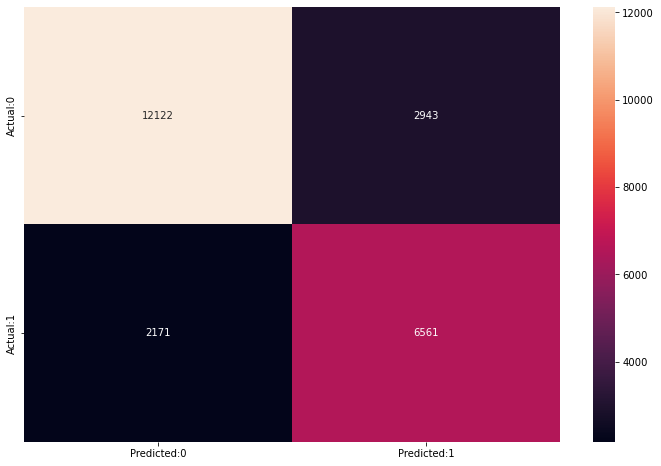

In [341]:
cm = confusion_matrix(y_test, y_pred_best)
con_mat = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index = ['Actual:0', 'Actual:1'])
sns.heatmap(con_mat, annot = True, fmt = 'd')

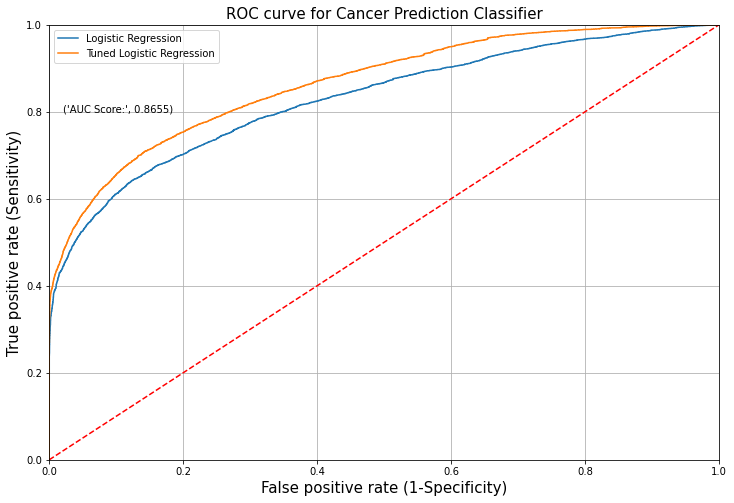

In [182]:
y_scores_best = best_logreg.predict_proba(X_test)
y_scores_best=y_scores_best[:, 1]
fpr_best_log, tpr_best_log, th_best_log = roc_curve(y_test, y_scores_best)
plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.plot(fpr_best_log, tpr_best_log, label = 'Tuned Logistic Regression')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],'r--')
plt.title('ROC curve for Cancer Prediction Classifier', fontsize =15)
plt.xlabel('False positive rate (1-Specificity)', fontsize=15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x=0.02, y=0.8, s=('AUC Score:', round(roc_auc_score(y_test, y_scores_best),4)))
plt.grid(True)
plt.legend()
plt.show()

In [183]:
score_card_Tuned['Logistic Regression'] = [roc_auc_score(y_test, y_pred_best),precision_score(y_test,y_pred_best),
                                           recall_score(y_test, y_pred_best),
                              accuracy_score(y_test, y_pred_best), cohen_kappa_score(y_test, y_pred_best),
                                           f1_score(y_test, y_pred_best)]
score_card_Tuned

,Logistic Regression
Metrics,
AUC Score,0.778010
Precision Score,0.690341
Recall Score,0.751374
Accuracy Score,0.785099
Kappa Score,0.545877
f1-score,0.719566


In [185]:
acc_tuned_train_and_test['Logistic Regression']=[best_logreg.score(X_train,y_train),best_logreg.score(X_test,y_test)]
acc_tuned_train_and_test

,Logistic Regression
set,
training,0.784122
testing,0.785099


<font color="red" size=5px><b>Decision Tree for Classification</b>
    </font></b>
    </font>

In [186]:
%%time
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
decision_tree = decision_tree_classification.fit(X_train, y_train)

Wall time: 1.51 s


<font color="red" size=3px><b>Over-fitting in Decision Tree </b>
    </font></b>
    </font>

The decision tree is said to be over-fitted if it tries to perfectly fit all the observations in the training data. We can calculate the difference between the train and test accuracy to identify if there is over-fitting.

##### Calculate performance measures on the train set

In [187]:
train_pred = decision_tree.predict(X_train)
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     59806
           1       0.99      0.97      0.98     35382

    accuracy                           0.99     95188
   macro avg       0.99      0.98      0.99     95188
weighted avg       0.99      0.99      0.99     95188



##### Calculate performance measures on the test set

In [188]:
test_pred = decision_tree.predict(X_test)
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86     15065
           1       0.76      0.77      0.76      8732

    accuracy                           0.82     23797
   macro avg       0.81      0.81      0.81     23797
weighted avg       0.82      0.82      0.82     23797



<AxesSubplot:>

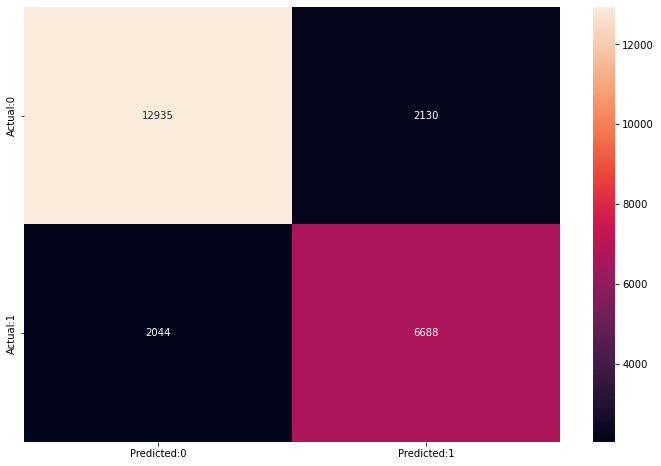

In [190]:
y_pred_dt=decision_tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred_dt)
con_mat = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index = ['Actual:0', 'Actual:1'])
sns.heatmap(con_mat, annot = True, fmt = 'd')

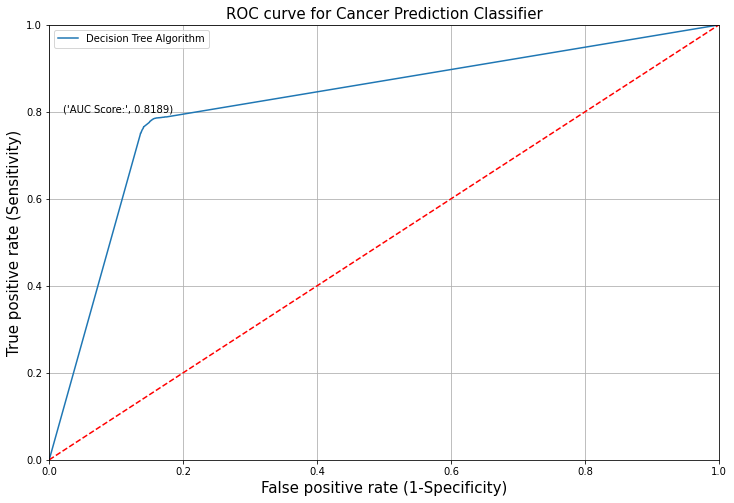

In [191]:
y_scores_dt = decision_tree.predict_proba(X_test)[:,1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_scores_dt)
plt.plot(fpr_dt, tpr_dt,label='Decision Tree Algorithm')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],'r--')
plt.title('ROC curve for Cancer Prediction Classifier', fontsize =15)
plt.xlabel('False positive rate (1-Specificity)', fontsize=15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x=0.02, y=0.8, s=('AUC Score:', round(roc_auc_score(y_test, y_scores_dt),4)))
plt.grid(True)
plt.legend()
plt.show()

**Interpretation:** From the above output, we can see that there is a difference between the train and test accuracy; thus, we can conclude that the decision tree is over-fitted on the train data.

If we tune the hyperparameters in the decision tree, it helps to avoid the over-fitting of the tree.

In [192]:
score_card['Decision Tree'] = [roc_auc_score(y_test, y_pred_dt),precision_score(y_test,y_pred_dt),
                                           recall_score(y_test,y_pred_dt),
                              accuracy_score(y_test, y_pred_dt), cohen_kappa_score(y_test,y_pred_dt),
                                           f1_score(y_test, y_pred_dt)]
score_card

,Logistic Regression,Decision Tree
Metrics,,
AUC Score,0.755296,0.812266
Precision Score,0.784467,0.758449
Recall Score,0.607306,0.765918
Accuracy Score,0.794680,0.824600
Kappa Score,0.536037,0.623241
f1-score,0.684611,0.762165


In [193]:
acc_train_and_test['Decision Tree']=[decision_tree.score(X_train,y_train),decision_tree.score(X_test,y_test)]
acc_train_and_test

,Logistic Regression,Decision Tree
set,,
training,0.792033,0.986217
testing,0.794680,0.824600


<font color="red" size=3px><b>Tuning the Hyperparameters using GridSearchCV(Decision Tree)</b>
    </font></b>
    </font>
    
Hyperparameters are the parameters in the model that are preset by the user. GridSearch considers all the combinations of hyperparameters and returns the best hyperparameter values. We pass some of the hyperparameters in the decision tree to the ` GridSearchCV()` and build the tree using the optimal values obtained using GridSearch method.

##### assigning the best parameters to each variable

In [194]:
dt_criterion = 'entropy'
dt_max_depth = 6
dt_max_features = 'log2'
dt_max_leaf_nodes = 9
dt_min_samples_leaf = 1
dt_min_samples_split = 2

##### Build the model using the tuned hyperparameters

In [195]:
dt_model = DecisionTreeClassifier(criterion = dt_criterion,
                                  max_depth = dt_max_depth,
                                  max_features = dt_max_features,
                                  max_leaf_nodes = dt_max_leaf_nodes,
                                  min_samples_leaf = dt_min_samples_leaf,
                                  min_samples_split = dt_min_samples_split,
                                  random_state = 10)

dt_model = dt_model.fit(X_train, y_train)

##### Calculate performance measures on the train set

In [196]:
train_pred_tuned = dt_model.predict(X_train)
print(classification_report(y_train, train_pred_tuned))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79     59806
           1       0.64      0.65      0.65     35382

    accuracy                           0.73     95188
   macro avg       0.72      0.72      0.72     95188
weighted avg       0.74      0.73      0.73     95188



##### Calculate performance measures on the test set

In [197]:
test_pred_tuned = dt_model.predict(X_test)
print(classification_report(y_test, test_pred_tuned))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79     15065
           1       0.64      0.66      0.65      8732

    accuracy                           0.74     23797
   macro avg       0.72      0.72      0.72     23797
weighted avg       0.74      0.74      0.74     23797



**Interpretation:** From the above output, we can see that there is no significant difference between the train and test accuracy; thus, we can conclude that the decision tree after tuning the hyperparameters avoids the over-fitting of the data.

##### Confusion Matix after tuning the hyperparameters

<AxesSubplot:>

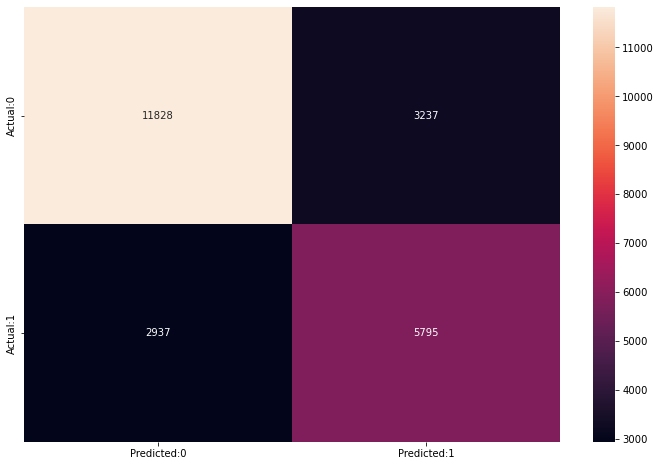

In [198]:
y_pred_bestdt=dt_model.predict(X_test)
cm = confusion_matrix(y_test,y_pred_bestdt)
con_mat = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index = ['Actual:0', 'Actual:1'])
sns.heatmap(con_mat, annot = True, fmt = 'd')

##### Plotting the ROC curve after tuning the hyperparameters

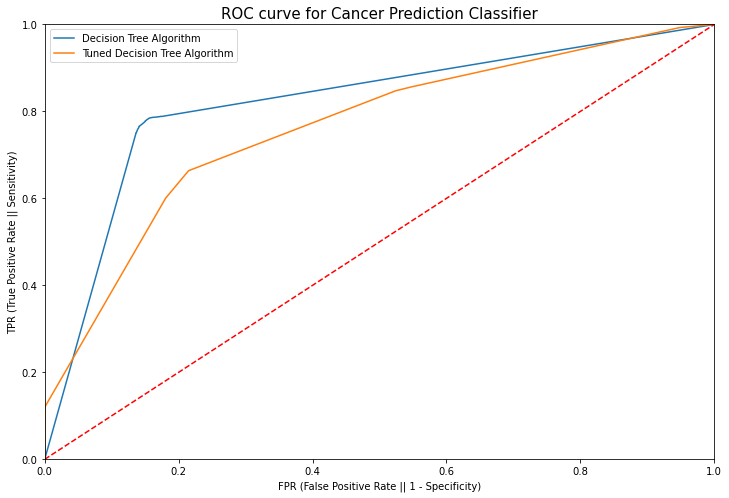

0.7622741748650944


In [199]:
y_scores_bestdt = dt_model.predict_proba(X_test)
y_scores_bestdt = y_scores_bestdt[:, 1]
fpr_bestdt, tpr_bestdt, th_bestdt = roc_curve(y_test, y_scores_bestdt)
plt.plot(fpr_dt, tpr_dt, label = 'Decision Tree Algorithm')
plt.plot(fpr_bestdt, tpr_bestdt, label = 'Tuned Decision Tree Algorithm')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.0])
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('FPR (False Positive Rate || 1 - Specificity)')
plt.ylabel('TPR (True Positive Rate || Sensitivity)')
plt.title('ROC curve for Cancer Prediction Classifier', fontsize =15)
plt.legend()
plt.show()
print(roc_auc_score(y_test, y_scores_bestdt))

##### calculating the metrics 

In [200]:
score_card_Tuned['Decision_Tree'] = [roc_auc_score(y_test,y_pred_bestdt),precision_score(y_test,y_pred_bestdt), 
                               recall_score(y_test, y_pred_bestdt),
                              accuracy_score(y_test,y_pred_bestdt), 
                               cohen_kappa_score(y_test,y_pred_bestdt), f1_score(y_test, y_pred_bestdt)]

In [201]:
score_card_Tuned

,Logistic Regression,Decision_Tree
Metrics,,
AUC Score,0.778010,0.724391
Precision Score,0.690341,0.641608
Recall Score,0.751374,0.663651
Accuracy Score,0.785099,0.740556
Kappa Score,0.545877,0.445564
f1-score,0.719566,0.652443


In [202]:
acc_tuned_train_and_test['Decision Tree']=[dt_model.score(X_train,y_train),dt_model.score(X_test,y_test)]
acc_tuned_train_and_test

,Logistic Regression,Decision Tree
set,,
training,0.784122,0.734494
testing,0.785099,0.740556


<font color="red" size=5px><b>Random Forest for Classification</b>
    </font></b>
    </font>

In [203]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)
rf_model = rf_classification.fit(X_train, y_train)

##### Calculate performance measures on the train set

In [204]:
train_pred_rf = rf_model.predict(X_train)
print(classification_report(y_train, train_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     59806
           1       0.98      0.96      0.97     35382

    accuracy                           0.98     95188
   macro avg       0.98      0.97      0.98     95188
weighted avg       0.98      0.98      0.98     95188



##### Calculate performance measures on the test set

In [205]:
test_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, test_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89     15065
           1       0.84      0.74      0.79      8732

    accuracy                           0.86     23797
   macro avg       0.85      0.83      0.84     23797
weighted avg       0.85      0.86      0.85     23797



**Interpretation:** From the above output, we can see that there is a difference between the train and test accuracy; thus, we can conclude that the Random Forest is over-fitted on the train data

<AxesSubplot:>

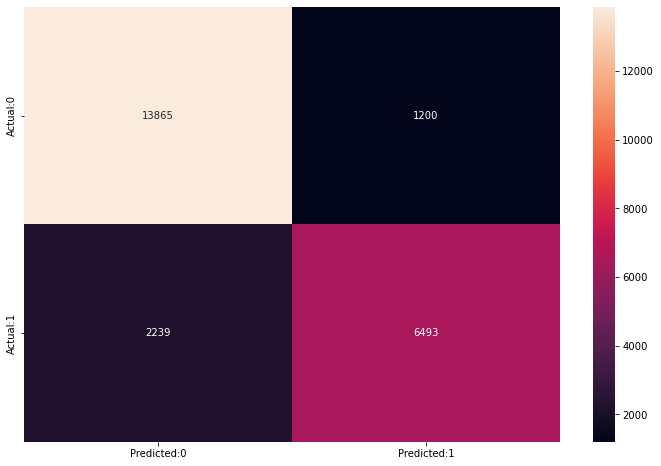

In [206]:
y_pred_rf=rf_model.predict(X_test)
cm = confusion_matrix(y_test,y_pred_rf)
con_mat = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index = ['Actual:0', 'Actual:1'])
sns.heatmap(con_mat, annot = True, fmt = 'd')

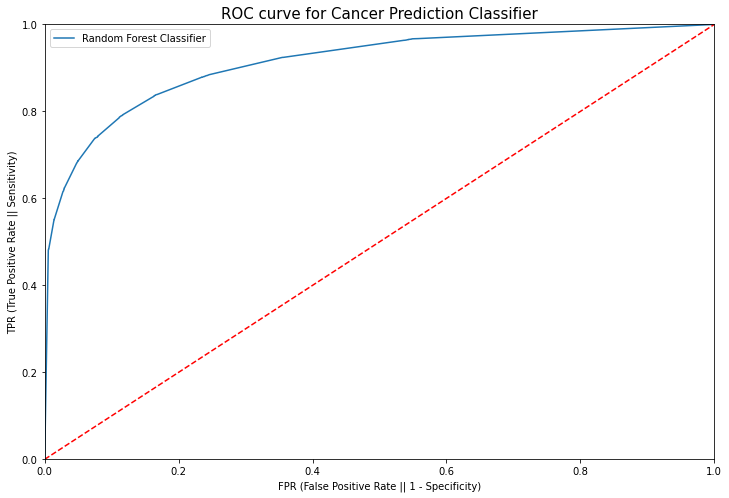

0.9125796308833657


In [208]:
y_scores_rf = rf_model.predict_proba(X_test)
y_scores_rf = y_scores_rf[:, 1]
fpr_rf, tpr_rf, th_rf = roc_curve(y_test, y_scores_rf)
plt.plot(fpr_rf,tpr_rf,label='Random Forest Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.0])
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('FPR (False Positive Rate || 1 - Specificity)')
plt.ylabel('TPR (True Positive Rate || Sensitivity)')
plt.title('ROC curve for Cancer Prediction Classifier', fontsize =15)
plt.legend()
plt.show()
print(roc_auc_score(y_test, y_scores_rf))

In [209]:
score_card['Random Forest'] = [roc_auc_score(y_test, y_pred_rf),precision_score(y_test,y_pred_rf), 
                               recall_score(y_test, y_pred_rf),
                              accuracy_score(y_test,y_pred_rf), 
                               cohen_kappa_score(y_test,y_pred_rf), f1_score(y_test, y_pred_rf)]
score_card

,Logistic Regression,Decision Tree,Random Forest
Metrics,,,
AUC Score,0.755296,0.812266,0.831966
Precision Score,0.784467,0.758449,0.844014
Recall Score,0.607306,0.765918,0.743587
Accuracy Score,0.794680,0.824600,0.855486
Kappa Score,0.536037,0.623241,0.680963
f1-score,0.684611,0.762165,0.790624


In [210]:
acc_train_and_test['Random Forest']=[rf_model.score(X_train,y_train),rf_model.score(X_test,y_test)]
acc_train_and_test

,Logistic Regression,Decision Tree,Random Forest
set,,,
training,0.792033,0.986217,0.977035
testing,0.794680,0.824600,0.855486


<font color="red" size=3px><b>Tuning the Hyperparameters using GridSearchCV(Random Forest)</b>
    </font></b>
    </font>

Best parameters for random forest classifier:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 11, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators':70}

In [212]:
rf_criterion = 'gini'
rf_max_depth = 10
rf_max_features = 'sqrt'
rf_max_leaf_nodes = 11
rf_min_samples_leaf = 1
rf_min_samples_split = 2
rf_n_estimators = 70

##### Build the model using the tuned hyperparameters

In [213]:
rf_model_g = RandomForestClassifier(criterion = rf_criterion, 
                                  n_estimators = rf_n_estimators,
                                  max_depth = rf_max_depth,
                                  max_features = rf_max_features,
                                  max_leaf_nodes = rf_max_leaf_nodes,
                                  min_samples_leaf = rf_min_samples_leaf,
                                  min_samples_split = rf_min_samples_split,
                                  random_state = 10)


rf_model_g = rf_model.fit(X_train, y_train)

##### Calculate performance measures on the train set

In [214]:
train_pred_trf= rf_model_g.predict(X_train)
print(classification_report(y_train, train_pred_trf))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     59806
           1       0.98      0.96      0.97     35382

    accuracy                           0.98     95188
   macro avg       0.98      0.97      0.98     95188
weighted avg       0.98      0.98      0.98     95188



##### Calculate performance measures on the test set

In [215]:
test_pred_trf = rf_model_g.predict(X_test)
print(classification_report(y_test, test_pred_trf))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89     15065
           1       0.84      0.74      0.79      8732

    accuracy                           0.86     23797
   macro avg       0.85      0.83      0.84     23797
weighted avg       0.85      0.86      0.85     23797



<AxesSubplot:>

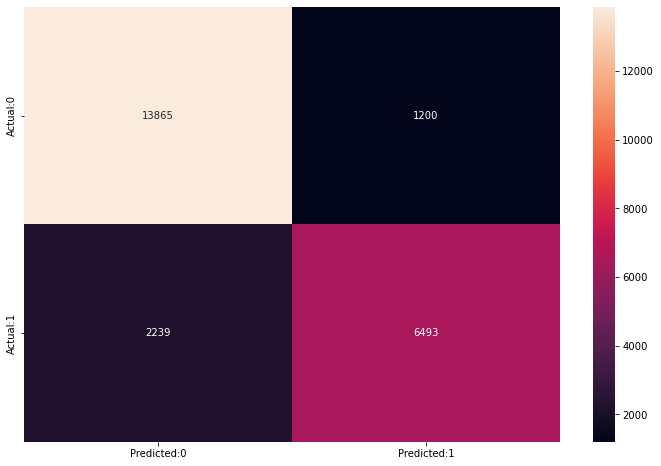

In [216]:
y_pred_trf=rf_model_g.predict(X_test)
cm = confusion_matrix(y_test,y_pred_trf)
con_mat = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index = ['Actual:0', 'Actual:1'])
sns.heatmap(con_mat, annot = True, fmt = 'd')

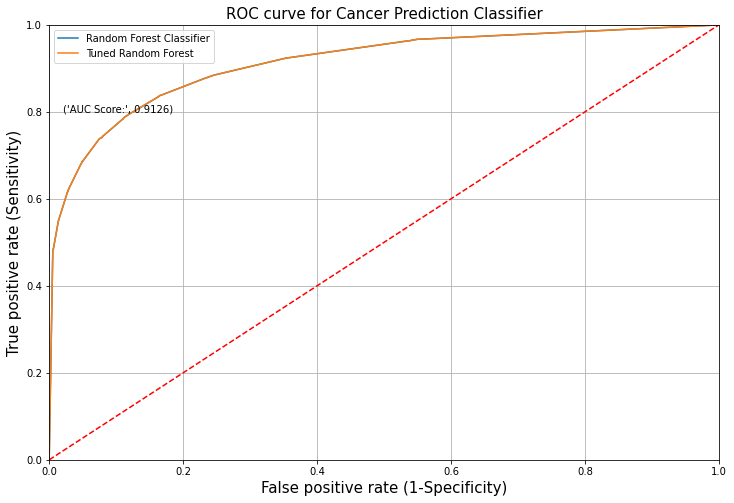

In [217]:
y_scores_trf = rf_model_g.predict_proba(X_test)[:,1]
fpr_trf, tpr_trf, thresholds_trf = roc_curve(y_test, y_scores_trf)
plt.plot(fpr_rf,tpr_rf,label='Random Forest Classifier')
plt.plot(fpr_trf, tpr_trf,label='Tuned Random Forest')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],'r--')
plt.title('ROC curve for Cancer Prediction Classifier', fontsize =15)
plt.xlabel('False positive rate (1-Specificity)', fontsize=15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x=0.02, y=0.8, s=('AUC Score:', round(roc_auc_score(y_test, y_scores_trf),4)))
plt.legend()
plt.grid(True)
plt.show()

##### Calculating the metrics

In [218]:
score_card_Tuned['Random Forest'] = [roc_auc_score(y_test, y_pred_trf),precision_score(y_test,y_pred_trf), 
                               recall_score(y_test, y_pred_trf),
                              accuracy_score(y_test,y_pred_trf), 
                               cohen_kappa_score(y_test,y_pred_trf), f1_score(y_test, y_pred_trf)]
score_card_Tuned

,Logistic Regression,Decision_Tree,Random Forest
Metrics,,,
AUC Score,0.778010,0.724391,0.831966
Precision Score,0.690341,0.641608,0.844014
Recall Score,0.751374,0.663651,0.743587
Accuracy Score,0.785099,0.740556,0.855486
Kappa Score,0.545877,0.445564,0.680963
f1-score,0.719566,0.652443,0.790624


In [220]:
acc_tuned_train_and_test['Random Forest']=[rf_model_g.score(X_train,y_train),rf_model_g.score(X_test,y_test)]
acc_tuned_train_and_test

,Logistic Regression,Decision Tree,Random Forest
set,,,
training,0.784122,0.734494,0.977035
testing,0.785099,0.740556,0.855486


<font color="red" size=5px><b>K Nearest Neighbors (KNN)</b>
    </font></b>
    </font>

In [221]:
knn_classification = KNeighborsClassifier(n_neighbors = 3)
knn_model = knn_classification.fit(X_train, y_train)

###### Calculate performance metrics on train set

In [222]:
%%time
train_pred_KNN = knn_model.predict(X_train)
print(classification_report(y_train, train_pred_KNN))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91     59806
           1       0.86      0.84      0.85     35382

    accuracy                           0.89     95188
   macro avg       0.89      0.88      0.88     95188
weighted avg       0.89      0.89      0.89     95188

Wall time: 3min 7s


###### Calculate performance metrics on test set

In [223]:
%%time
test_pred_KNN = knn_model.predict(X_test)
print(classification_report(y_test, test_pred_KNN))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84     15065
           1       0.73      0.73      0.73      8732

    accuracy                           0.80     23797
   macro avg       0.79      0.79      0.79     23797
weighted avg       0.80      0.80      0.80     23797

Wall time: 47.8 s


##### Confusion Matrix

<AxesSubplot:>

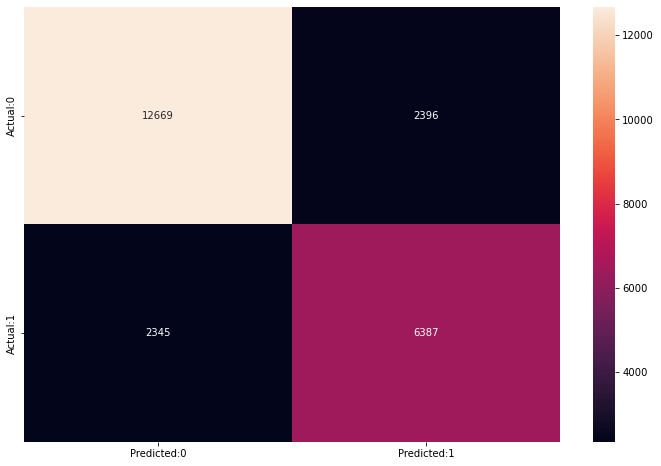

In [224]:
y_pred_KNN=knn_model.predict(X_test)
cm = confusion_matrix(y_test,y_pred_KNN)
con_mat = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index = ['Actual:0', 'Actual:1'])
sns.heatmap(con_mat, annot = True, fmt = 'd')

##### Plotting the ROC curve

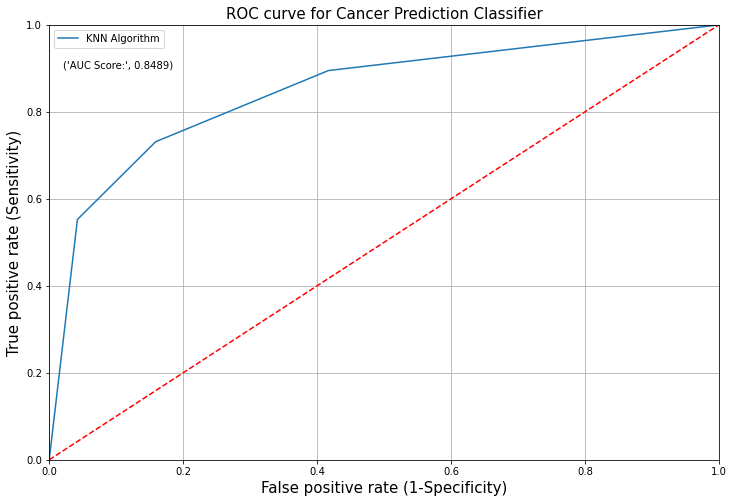

In [225]:
y_scores_KNN = knn_model.predict_proba(X_test)[:,1]
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, y_scores_KNN)
plt.plot(fpr_KNN, tpr_KNN,label='KNN Algorithm')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],'r--')
plt.title('ROC curve for Cancer Prediction Classifier', fontsize =15)
plt.xlabel('False positive rate (1-Specificity)', fontsize=15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x=0.02, y=0.9, s=('AUC Score:', round(roc_auc_score(y_test, y_scores_KNN),4)))
plt.legend()
plt.grid(True)
plt.show()

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>
From the above plot, we can see that our classifier (knn_model with n_neighbors = 3) is away from the dotted line; with the AUC score 0.8489.

In [226]:
score_card['KNN'] = [roc_auc_score(y_test, y_pred_KNN),precision_score(y_test,y_pred_KNN), 
                               recall_score(y_test, y_pred_KNN),
                              accuracy_score(y_test,y_pred_KNN), 
                               cohen_kappa_score(y_test,y_pred_KNN), f1_score(y_test, y_pred_KNN)]
score_card

,Logistic Regression,Decision Tree,Random Forest,KNN
Metrics,,,,
AUC Score,0.755296,0.812266,0.831966,0.786202
Precision Score,0.784467,0.758449,0.844014,0.727200
Recall Score,0.607306,0.765918,0.743587,0.731448
Accuracy Score,0.794680,0.824600,0.855486,0.800773
Kappa Score,0.536037,0.623241,0.680963,0.571702
f1-score,0.684611,0.762165,0.790624,0.729318


In [227]:
acc_train_and_test['KNN']=[knn_model.score(X_train,y_train),knn_model.score(X_test,y_test)]
acc_train_and_test

,Logistic Regression,Decision Tree,Random Forest,KNN
set,,,,
training,0.792033,0.986217,0.977035,0.891467
testing,0.794680,0.824600,0.855486,0.800773


<font color="red" size=3px><b>Optimal Value of K (using GridSearchCV)</b>
    </font></b>
    </font>

###### assigning each best parameter to variables

In [228]:
knn_metric = 'hamming'
knn_n_neighbors = 7

##### KNN model using the best parameters

In [229]:
knn_best = KNeighborsClassifier(n_neighbors = knn_n_neighbors, metric=knn_metric)
knn_model_best = knn_best.fit(X_train, y_train)

##### calculate performance metrics on train data

In [230]:
train_pred_TKNN = knn_model_best.predict(X_train)
print(classification_report(y_train, train_pred_TKNN))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90     59806
           1       0.85      0.77      0.81     35382

    accuracy                           0.87     95188
   macro avg       0.86      0.85      0.85     95188
weighted avg       0.86      0.87      0.86     95188



###### calculate performance metrics on test data

In [231]:
%%time
test_pred_TKNN = knn_model_best.predict(X_test)
print(classification_report(y_test, test_pred_TKNN))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86     15065
           1       0.78      0.71      0.75      8732

    accuracy                           0.82     23797
   macro avg       0.81      0.80      0.81     23797
weighted avg       0.82      0.82      0.82     23797

Wall time: 9min 15s


<AxesSubplot:>

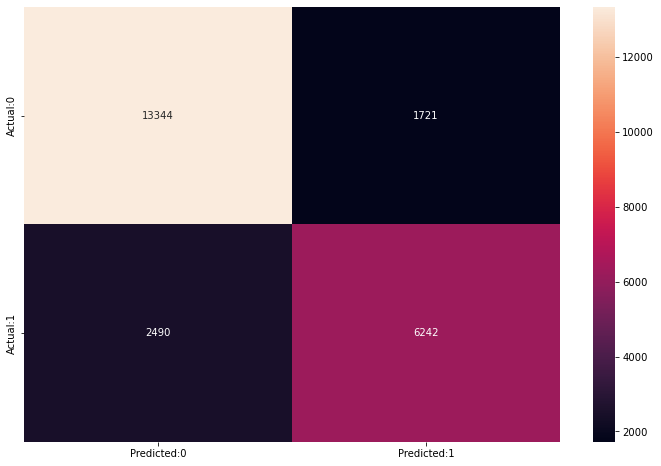

In [232]:
y_pred_TKNN=knn_model_best.predict(X_test)
cm = confusion_matrix(y_test,y_pred_TKNN)
con_mat = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index = ['Actual:0', 'Actual:1'])
sns.heatmap(con_mat, annot = True, fmt = 'd')

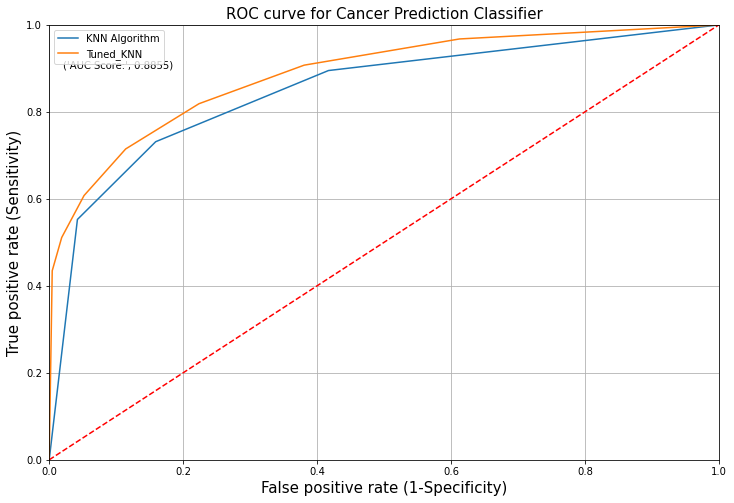

Wall time: 9min 18s


In [233]:
%%time
y_scores_TKNN = knn_model_best.predict_proba(X_test)[:,1]
fpr_TKNN, tpr_TKNN, thresholds_TKNN = roc_curve(y_test, y_scores_TKNN)
plt.plot(fpr_KNN, tpr_KNN,label='KNN Algorithm')
plt.plot(fpr_TKNN, tpr_TKNN,label='Tuned_KNN')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],'r--')
plt.title('ROC curve for Cancer Prediction Classifier', fontsize =15)
plt.xlabel('False positive rate (1-Specificity)', fontsize=15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x=0.02, y=0.9, s=('AUC Score:', round(roc_auc_score(y_test, y_scores_TKNN),4)))
plt.legend()
plt.grid(True)
plt.show()

##### Calculating the metrics

In [237]:
%%time
score_card_Tuned['KNN'] = [roc_auc_score(y_test,y_pred_TKNN),precision_score(y_test,y_pred_TKNN), 
                                 recall_score(y_test, y_pred_TKNN),
                              accuracy_score(y_test, y_pred_TKNN),
                           cohen_kappa_score(y_test, y_pred_TKNN), f1_score(y_test, y_pred_TKNN)]
score_card_Tuned

Wall time: 280 ms


,Logistic Regression,Decision_Tree,Random Forest,KNN
Metrics,,,,
AUC Score,0.778010,0.724391,0.831966,0.800302
Precision Score,0.690341,0.641608,0.844014,0.783875
Recall Score,0.751374,0.663651,0.743587,0.714842
Accuracy Score,0.785099,0.740556,0.855486,0.823045
Kappa Score,0.545877,0.445564,0.680963,0.611931
f1-score,0.719566,0.652443,0.790624,0.747769


In [309]:
%%time
acc_tuned_train_and_test['KNN']=[knn_model_best.score(X_train,y_train),knn_model_best.score(X_test,y_test)]
acc_tuned_train_and_test

Wall time: 44min 38s


,Logistic Regression,Decision Tree,Random Forest,XGB,KNN
set,,,,,
training,0.784122,0.734494,0.977035,0.893800,0.865067
testing,0.785099,0.740556,0.855486,0.858217,0.823045


<font color="red" size=5px><b>Naive Bayes Algorithm</b>
    </font></b>
    </font>

In [240]:
gnb = GaussianNB()
gnb_model = gnb.fit(X_train, y_train)

###### Calculate performance metrics on train set

In [241]:
train_pred_gnb = gnb_model.predict(X_train)
print(classification_report(y_train, train_pred_gnb))

              precision    recall  f1-score   support

           0       0.88      0.44      0.59     59806
           1       0.49      0.90      0.63     35382

    accuracy                           0.61     95188
   macro avg       0.68      0.67      0.61     95188
weighted avg       0.73      0.61      0.60     95188



###### Calculate performance metrics on test set

In [242]:
test_pred_gnb = gnb_model.predict(X_test)
print(classification_report(y_test, test_pred_gnb))

              precision    recall  f1-score   support

           0       0.89      0.44      0.59     15065
           1       0.48      0.90      0.63      8732

    accuracy                           0.61     23797
   macro avg       0.68      0.67      0.61     23797
weighted avg       0.74      0.61      0.60     23797



##### Confusion Matrix

<AxesSubplot:>

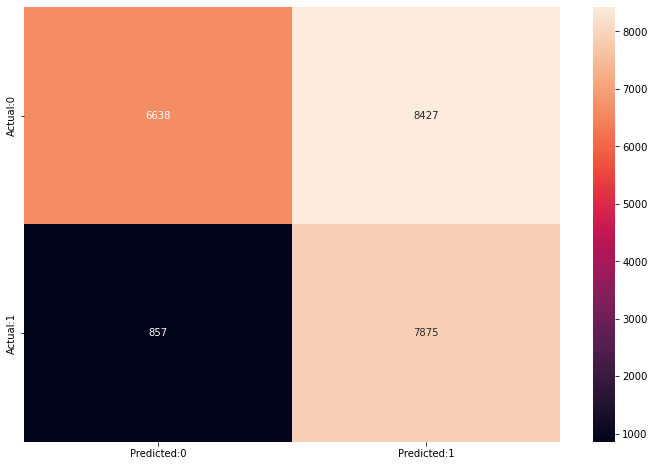

In [243]:
y_pred_gnb=gnb_model.predict(X_test)
cm = confusion_matrix(y_test,y_pred_gnb)
con_mat = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index = ['Actual:0', 'Actual:1'])
sns.heatmap(con_mat, annot = True, fmt = 'd')

##### Plotting the ROC curve

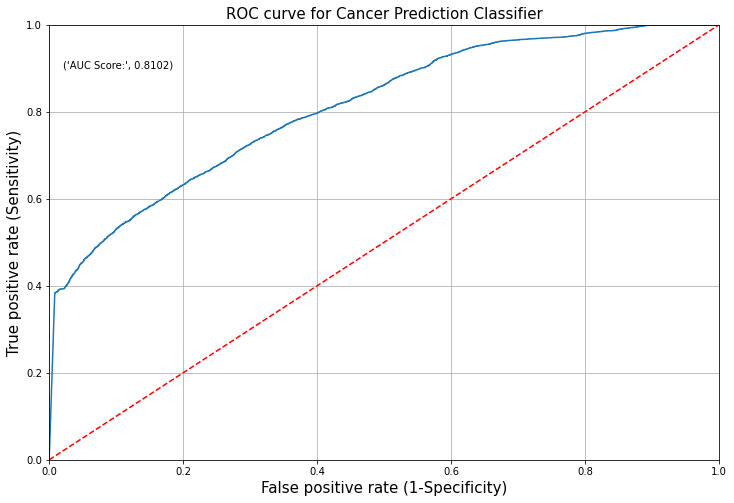

In [244]:
y_scores_gnb = gnb_model.predict_proba(X_test)[:,1]
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, y_scores_gnb)
plt.plot(fpr_gnb, tpr_gnb,label='Naive Bayes')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],'r--')
plt.title('ROC curve for Cancer Prediction Classifier', fontsize =15)
plt.xlabel('False positive rate (1-Specificity)', fontsize=15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x=0.02, y=0.9, s=('AUC Score:', round(roc_auc_score(y_test, y_scores_gnb),4)))
plt.grid(True)

**Interpretation:** From the above plot, we can see that our classifier (gnb_model) is away from the red dotted line; with the AUC score 0.8102.

In [245]:
score_card['NB'] = [roc_auc_score(y_test, y_pred_gnb),precision_score(y_test,y_pred_gnb), 
                             recall_score(y_test, y_pred_gnb),
                              accuracy_score(y_test, y_pred_gnb), cohen_kappa_score(y_test, y_pred_gnb),
                             f1_score(y_test, y_pred_gnb)]
score_card

,Logistic Regression,Decision Tree,Random Forest,KNN,NB
Metrics,,,,,
AUC Score,0.755296,0.812266,0.831966,0.786202,0.671240
Precision Score,0.784467,0.758449,0.844014,0.727200,0.483070
Recall Score,0.607306,0.765918,0.743587,0.731448,0.901855
Accuracy Score,0.794680,0.824600,0.855486,0.800773,0.609867
Kappa Score,0.536037,0.623241,0.680963,0.571702,0.289692
f1-score,0.684611,0.762165,0.790624,0.729318,0.629144


In [246]:
acc_train_and_test['NB']=[gnb_model.score(X_train,y_train),gnb_model.score(X_test,y_test)]
acc_train_and_test

,Logistic Regression,Decision Tree,Random Forest,KNN,NB
set,,,,,
training,0.792033,0.986217,0.977035,0.891467,0.609720
testing,0.794680,0.824600,0.855486,0.800773,0.609867


## Voting Classifier

In [247]:
from sklearn.ensemble import VotingClassifier

In [248]:
vote = VotingClassifier([('LR', LogisticRegression()), 
                  ('knn', KNeighborsClassifier()), 
                 ('DT', DecisionTreeClassifier()),  
                 ('RF', RandomForestClassifier())], voting = 'soft')

In [249]:
vote.fit(X_train, y_train)

VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('knn', KNeighborsClassifier()),
                             ('DT', DecisionTreeClassifier()),
                             ('RF', RandomForestClassifier())],
                 voting='soft')

In [250]:
vote.score(X_train, y_train)

0.982739420935412

In [251]:
%%time
vote.score(X_test, y_test)

Wall time: 1min 1s


0.8530066815144766

Wall time: 1min 1s


<AxesSubplot:>

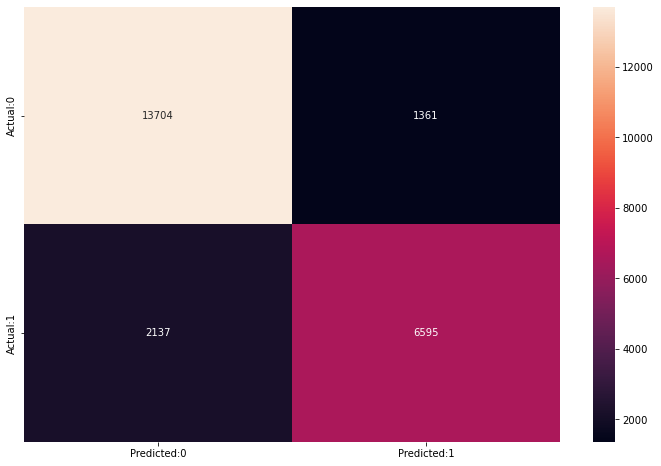

In [252]:
%%time
y_pred_vote=vote.predict(X_test)
cm = confusion_matrix(y_test,y_pred_vote)
con_mat = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index = ['Actual:0', 'Actual:1'])
sns.heatmap(con_mat, annot = True, fmt = 'd')

Wall time: 59.4 s


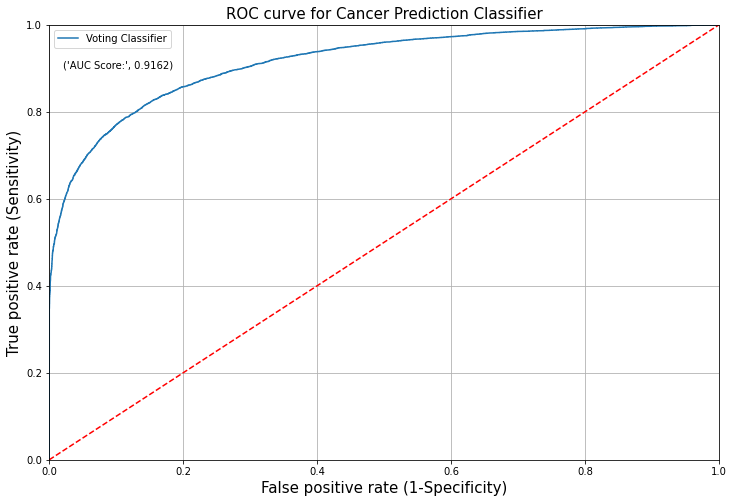

In [253]:
%%time
y_scores_vote = vote.predict_proba(X_test)
y_scores_vote = y_scores_vote[:, 1]
fpr_vote, tpr_vote, th_vote = roc_curve(y_test, y_scores_vote)
plt.plot(fpr_vote,tpr_vote,label='Voting Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],'r--')
plt.title('ROC curve for Cancer Prediction Classifier', fontsize =15)
plt.xlabel('False positive rate (1-Specificity)', fontsize=15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x=0.02, y=0.9, s=('AUC Score:', round(roc_auc_score(y_test, y_scores_vote),4)))
plt.legend()
plt.grid(True)

In [254]:
score_card['Voting'] = [roc_auc_score(y_test, y_pred_vote),precision_score(y_test, y_pred_vote), 
                             recall_score(y_test,  y_pred_vote),
                              accuracy_score(y_test,  y_pred_vote), cohen_kappa_score(y_test,  y_pred_vote),
                             f1_score(y_test, y_pred_vote)]
score_card

,Logistic Regression,Decision Tree,Random Forest,KNN,NB,Voting
Metrics,,,,,,
AUC Score,0.755296,0.812266,0.831966,0.786202,0.671240,0.832463
Precision Score,0.784467,0.758449,0.844014,0.727200,0.483070,0.828934
Recall Score,0.607306,0.765918,0.743587,0.731448,0.901855,0.755268
Accuracy Score,0.794680,0.824600,0.855486,0.800773,0.609867,0.853007
Kappa Score,0.536037,0.623241,0.680963,0.571702,0.289692,0.677583
f1-score,0.684611,0.762165,0.790624,0.729318,0.629144,0.790388


In [255]:
acc_train_and_test['Voting']=[0.982739,0.8530066]
acc_train_and_test

,Logistic Regression,Decision Tree,Random Forest,KNN,NB,Voting
set,,,,,,
training,0.792033,0.986217,0.977035,0.891467,0.609720,0.982739
testing,0.794680,0.824600,0.855486,0.800773,0.609867,0.853007


## Bagging Classifier

In [256]:
from sklearn.ensemble import BaggingClassifier

In [258]:
bag = BaggingClassifier(DecisionTreeClassifier(), n_estimators=15)

In [259]:
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=15)

<AxesSubplot:>

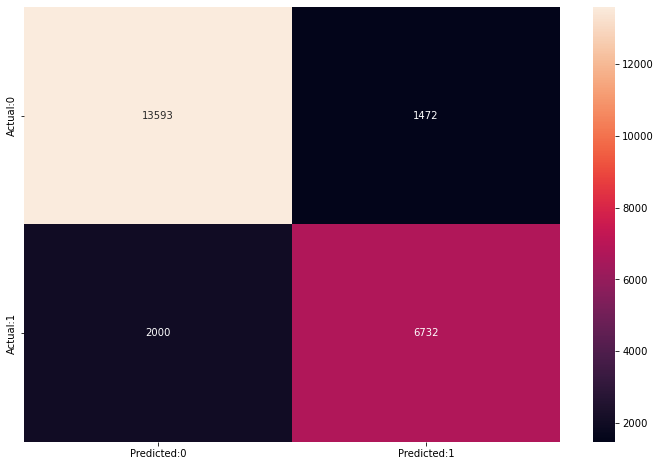

In [260]:
y_pred_bag=bag.predict(X_test)
cm = confusion_matrix(y_test,y_pred_bag)
con_mat = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index = ['Actual:0', 'Actual:1'])
sns.heatmap(con_mat, annot = True, fmt = 'd')

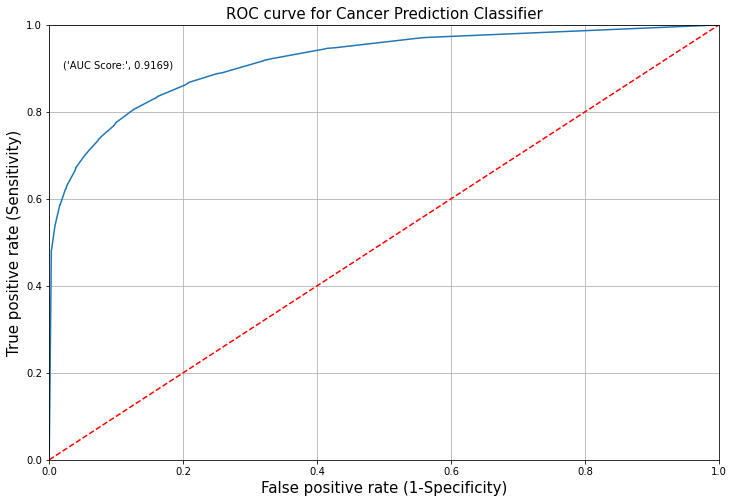

In [261]:
y_scores_bag = bag.predict_proba(X_test)
y_scores_bag = y_scores_bag[:, 1]
fpr_bag, tpr_bag, th_bag = roc_curve(y_test, y_scores_bag)
plt.plot(fpr_bag,tpr_bag,label='Bagging Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],'r--')
plt.title('ROC curve for Cancer Prediction Classifier', fontsize =15)
plt.xlabel('False positive rate (1-Specificity)', fontsize=15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x=0.02, y=0.9, s=('AUC Score:', round(roc_auc_score(y_test, y_scores_bag),4)))
plt.grid(True)

In [262]:
score_card['Bagging'] = [roc_auc_score(y_test, y_pred_bag),precision_score(y_test, y_pred_bag), 
                             recall_score(y_test,  y_pred_bag),
                              accuracy_score(y_test,  y_pred_bag), cohen_kappa_score(y_test,  y_pred_bag),
                             f1_score(y_test, y_pred_bag)]
score_card

,Logistic Regression,Decision Tree,Random Forest,KNN,NB,Voting,Bagging
Metrics,,,,,,,
AUC Score,0.755296,0.812266,0.831966,0.786202,0.671240,0.832463,0.836624
Precision Score,0.784467,0.758449,0.844014,0.727200,0.483070,0.828934,0.820575
Recall Score,0.607306,0.765918,0.743587,0.731448,0.901855,0.755268,0.770957
Accuracy Score,0.794680,0.824600,0.855486,0.800773,0.609867,0.853007,0.854099
Kappa Score,0.536037,0.623241,0.680963,0.571702,0.289692,0.677583,0.681914
f1-score,0.684611,0.762165,0.790624,0.729318,0.629144,0.790388,0.794993


In [263]:
acc_train_and_test['Bagging']=[bag.score(X_train,y_train),bag.score(X_test,y_test)]
acc_train_and_test

,Logistic Regression,Decision Tree,Random Forest,KNN,NB,Voting,Bagging
set,,,,,,,
training,0.792033,0.986217,0.977035,0.891467,0.609720,0.982739,0.982057
testing,0.794680,0.824600,0.855486,0.800773,0.609867,0.853007,0.854099


## Tuned Bagging Classifier

In [313]:
tuned_bag = BaggingClassifier(base_estimator=RandomForestClassifier(),
                             max_features=1,
                             max_samples=1,n_estimators=10,random_state=10)


In [314]:
tuned_bag=tuned_bag.fit(X_train,y_train)

In [315]:
train_pred_tbag=tuned_bag.predict(X_train)
print(classification_report(y_train,train_pred_tbag))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77     59806
           1       0.00      0.00      0.00     35382

    accuracy                           0.63     95188
   macro avg       0.31      0.50      0.39     95188
weighted avg       0.39      0.63      0.48     95188



In [316]:
test_pred_tbag=tuned_bag.predict(X_test)
print(classification_report(y_test,test_pred_tbag))

              precision    recall  f1-score   support

           0       0.63      1.00      0.78     15065
           1       0.00      0.00      0.00      8732

    accuracy                           0.63     23797
   macro avg       0.32      0.50      0.39     23797
weighted avg       0.40      0.63      0.49     23797



<AxesSubplot:>

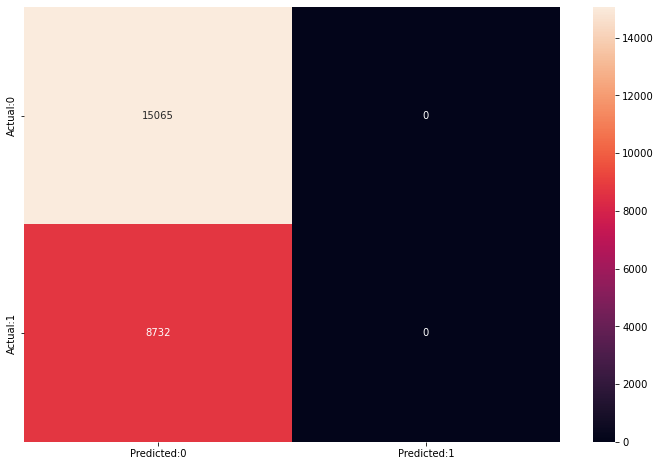

In [317]:
y_pred_tbag=tuned_bag.predict(X_test)
cm = confusion_matrix(y_test,y_pred_tbag)
con_mat = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index = ['Actual:0', 'Actual:1'])
sns.heatmap(con_mat, annot = True, fmt = 'd')


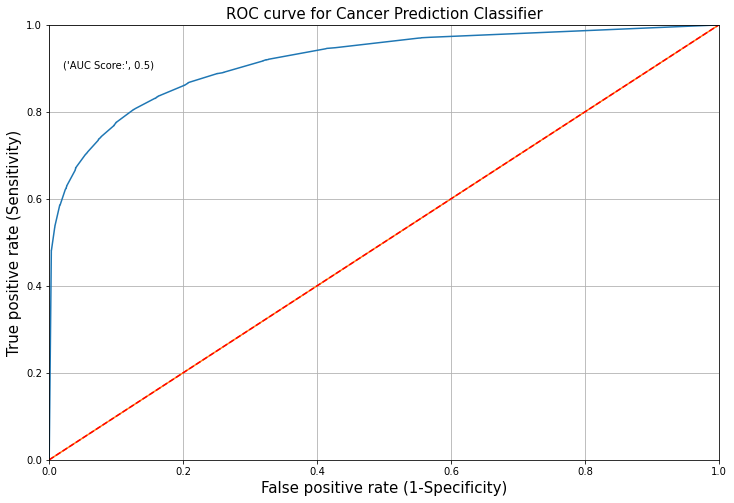

In [318]:
y_scores_tbag = tuned_bag.predict_proba(X_test)
y_scores_tbag = y_scores_tbag[:, 1]
fpr_tbag, tpr_tbag, th_tbag = roc_curve(y_test, y_scores_tbag)
plt.plot(fpr_bag,tpr_bag,label='Bagging Classifier')
plt.plot(fpr_tbag,tpr_tbag,label='Tuned Bagging Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],'r--')
plt.title('ROC curve for Cancer Prediction Classifier', fontsize =15)
plt.xlabel('False positive rate (1-Specificity)', fontsize=15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x=0.02, y=0.9, s=('AUC Score:', round(roc_auc_score(y_test, y_scores_tbag),4)))
plt.grid(True)

In [319]:
score_card_Tuned['Bagging']=[roc_auc_score(y_test, y_pred_tbag),precision_score(y_test,y_pred_tbag), 
                               recall_score(y_test, y_pred_tbag),
                              accuracy_score(y_test,y_pred_tbag), 
                               cohen_kappa_score(y_test,y_pred_tbag), f1_score(y_test, y_pred_tbag)]
score_card_Tuned

,Logistic Regression,Decision_Tree,Random Forest,KNN,XGB,Bagging
Metrics,,,,,,
AUC Score,0.778010,0.724391,0.831966,0.800302,0.834268,0.500000
Precision Score,0.690341,0.641608,0.844014,0.783875,0.850654,0.000000
Recall Score,0.751374,0.663651,0.743587,0.714842,0.744274,0.000000
Accuracy Score,0.785099,0.740556,0.855486,0.823045,0.858217,0.633063
Kappa Score,0.545877,0.445564,0.680963,0.611931,0.686583,0.000000
f1-score,0.719566,0.652443,0.790624,0.747769,0.793916,0.000000


In [321]:
acc_tuned_train_and_test['Bagging']=[tuned_bag.score(X_train,y_train),tuned_bag.score(X_test,y_test)]
acc_tuned_train_and_test

,Logistic Regression,Decision Tree,Random Forest,XGB,KNN,Bagging
set,,,,,,
training,0.784122,0.734494,0.977035,0.893800,0.865067,0.628293
testing,0.785099,0.740556,0.855486,0.858217,0.823045,0.633063


<font color="red" size=5px><b>Boosting Methods</b>
    </font></b>
    </font>

<font color="red" size=4.5px><b>AdaBoost</b>
    </font></b>
    </font>

In [264]:
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)
ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=40, random_state=10)

###### Calculate performance metrics on train set

In [265]:
train_pred_ada = ada_model.predict(X_train)
print(classification_report(y_train, train_pred_ada))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86     59806
           1       0.84      0.62      0.71     35382

    accuracy                           0.81     95188
   macro avg       0.82      0.77      0.79     95188
weighted avg       0.82      0.81      0.81     95188



###### Calculate performance metrics on test set

In [266]:
test_pred_ada = ada_model.predict(X_test)
print(classification_report(y_test, test_pred_ada))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86     15065
           1       0.83      0.62      0.71      8732

    accuracy                           0.82     23797
   macro avg       0.82      0.78      0.79     23797
weighted avg       0.82      0.82      0.81     23797



##### Confusion Matrix

<AxesSubplot:>

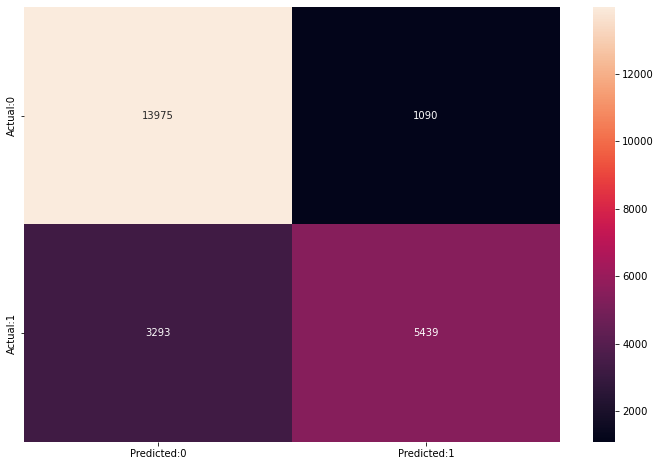

In [267]:
y_pred_ada=ada_model.predict(X_test)
cm = confusion_matrix(y_test,y_pred_ada)
con_mat = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index = ['Actual:0', 'Actual:1'])
sns.heatmap(con_mat, annot = True, fmt = 'd')

##### Plotting the ROC curve

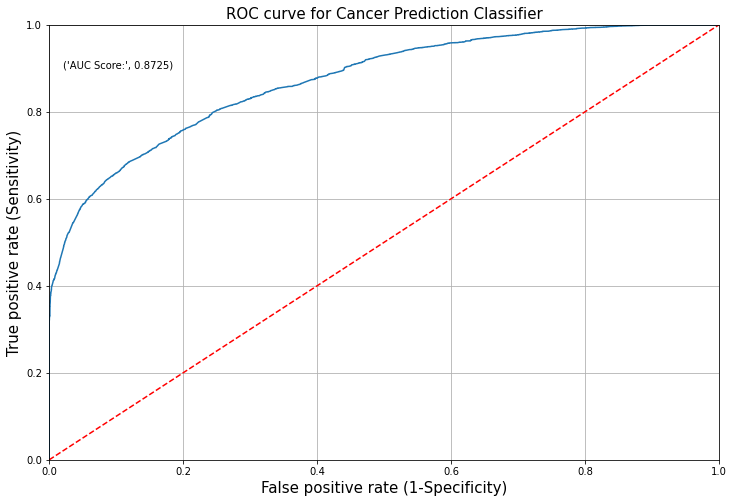

In [268]:
y_scores_ada = ada_model.predict_proba(X_test)
y_scores_ada = y_scores_ada[:, 1]
fpr_ada, tpr_ada, th_ada = roc_curve(y_test, y_scores_ada)
plt.plot(fpr_ada,tpr_ada,label='AdaBoost Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],'r--')
plt.title('ROC curve for Cancer Prediction Classifier', fontsize =15)
plt.xlabel('False positive rate (1-Specificity)', fontsize=15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x=0.02, y=0.9, s=('AUC Score:', round(roc_auc_score(y_test, y_scores_ada),4)))
plt.grid(True)

**Interpretation:** From the above plot, we can see that our classifier (ada_model) is away from the red dotted line; with the AUC score 0.8725.

##### calculating the metrics

In [269]:
score_card['AdaBoost'] = [roc_auc_score(y_test, y_pred_ada),precision_score(y_test,y_pred_ada), 
                          recall_score(y_test, y_pred_ada),
                              accuracy_score(y_test, y_pred_ada), cohen_kappa_score(y_test, y_pred_ada),
                          f1_score(y_test, y_pred_ada)]

In [270]:
score_card

,Logistic Regression,Decision Tree,Random Forest,KNN,NB,Voting,Bagging,AdaBoost
Metrics,,,,,,,,
AUC Score,0.755296,0.812266,0.831966,0.786202,0.671240,0.832463,0.836624,0.775264
Precision Score,0.784467,0.758449,0.844014,0.727200,0.483070,0.828934,0.820575,0.833053
Recall Score,0.607306,0.765918,0.743587,0.731448,0.901855,0.755268,0.770957,0.622881
Accuracy Score,0.794680,0.824600,0.855486,0.800773,0.609867,0.853007,0.854099,0.815817
Kappa Score,0.536037,0.623241,0.680963,0.571702,0.289692,0.677583,0.681914,0.581357
f1-score,0.684611,0.762165,0.790624,0.729318,0.629144,0.790388,0.794993,0.712797


In [272]:
acc_train_and_test['AdaBoost']=[ada_model.score(X_train,y_train),ada_model.score(X_test,y_test)]
acc_train_and_test

,Logistic Regression,Decision Tree,Random Forest,KNN,NB,Voting,Bagging,AdaBoost
set,,,,,,,,
training,0.792033,0.986217,0.977035,0.891467,0.609720,0.982739,0.982057,0.813317
testing,0.794680,0.824600,0.855486,0.800773,0.609867,0.853007,0.854099,0.815817


<font color="red" size=4.5px><b>Gradient Boosting</b>
    </font></b>
    </font>

In [273]:
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)
gboost_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=150, random_state=10)

###### Calculate performance metrics on train set

In [274]:
train_pred_gb = gboost_model.predict(X_train)
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     59806
           1       0.99      0.97      0.98     35382

    accuracy                           0.99     95188
   macro avg       0.99      0.98      0.99     95188
weighted avg       0.99      0.99      0.99     95188



###### Calculate performance metrics on test set

In [275]:
test_pred_gb = gboost_model.predict(X_test)
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86     15065
           1       0.76      0.77      0.76      8732

    accuracy                           0.82     23797
   macro avg       0.81      0.81      0.81     23797
weighted avg       0.82      0.82      0.82     23797



##### Confusion Matrix

<AxesSubplot:>

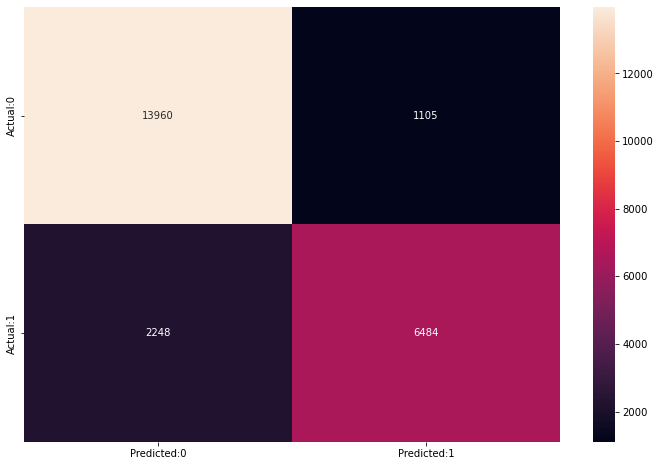

In [276]:
y_pred_gb=gboost_model.predict(X_test)
cm = confusion_matrix(y_test,y_pred_gb)
con_mat = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index = ['Actual:0', 'Actual:1'])
sns.heatmap(con_mat, annot = True, fmt = 'd')

##### Plotting the ROC curve

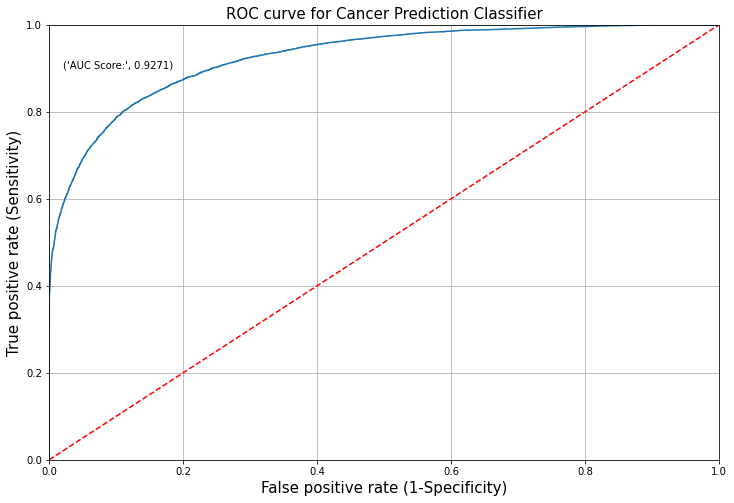

In [277]:
y_scores_gb = gboost_model.predict_proba(X_test)
y_scores_gb = y_scores_gb[:, 1]
fpr_gb, tpr_gb, th_gb = roc_curve(y_test, y_scores_gb)
plt.plot(fpr_gb,tpr_gb,label='GradientBoosting Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],'r--')
plt.title('ROC curve for Cancer Prediction Classifier', fontsize =15)
plt.xlabel('False positive rate (1-Specificity)', fontsize=15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x=0.02, y=0.9, s=('AUC Score:', round(roc_auc_score(y_test, y_scores_gb),4)))
plt.grid(True)

**Interpretation:** From the above plot, we can see that our classifier (gboost_model) is away from the red dotted line; with the AUC score 0.9261.

##### Calculating the metrics

In [278]:
score_card['GB'] = [roc_auc_score(y_test, y_pred_gb),precision_score(y_test,y_pred_gb),
                    recall_score(y_test,y_pred_gb),
                              accuracy_score(y_test,y_pred_gb), cohen_kappa_score(y_test,y_pred_gb), 
                    f1_score(y_test, y_pred_gb)]

In [279]:
score_card

,Logistic Regression,Decision Tree,Random Forest,KNN,NB,Voting,Bagging,AdaBoost,GB
Metrics,,,,,,,,,
AUC Score,0.755296,0.812266,0.831966,0.786202,0.671240,0.832463,0.836624,0.775264,0.834604
Precision Score,0.784467,0.758449,0.844014,0.727200,0.483070,0.828934,0.820575,0.833053,0.854395
Recall Score,0.607306,0.765918,0.743587,0.731448,0.901855,0.755268,0.770957,0.622881,0.742556
Accuracy Score,0.794680,0.824600,0.855486,0.800773,0.609867,0.853007,0.854099,0.815817,0.859100
Kappa Score,0.536037,0.623241,0.680963,0.571702,0.289692,0.677583,0.681914,0.581357,0.688140
f1-score,0.684611,0.762165,0.790624,0.729318,0.629144,0.790388,0.794993,0.712797,0.794559


In [280]:
acc_train_and_test['GB']=[gboost_model.score(X_train,y_train),gboost_model.score(X_test,y_test)]
acc_train_and_test

,Logistic Regression,Decision Tree,Random Forest,KNN,NB,Voting,Bagging,AdaBoost,GB
set,,,,,,,,,
training,0.792033,0.986217,0.977035,0.891467,0.609720,0.982739,0.982057,0.813317,0.907415
testing,0.794680,0.824600,0.855486,0.800773,0.609867,0.853007,0.854099,0.815817,0.859100


<font color="red" size=4.5px><b>XG Boosting</b>
    </font></b>
    </font>

In [281]:
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)
xgb_model.fit(X_train, y_train)

[13:37:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

###### Calculate performance metrics on train set

In [282]:
train_pred_xgb = xgb_model.predict(X_train)
print(classification_report(y_train, train_pred_xgb))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93     59806
           1       0.92      0.82      0.87     35382

    accuracy                           0.91     95188
   macro avg       0.91      0.89      0.90     95188
weighted avg       0.91      0.91      0.90     95188



###### Calculate performance metrics on test set

In [283]:
test_pred_xgb = xgb_model.predict(X_test)
print(classification_report(y_test, test_pred_xgb))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89     15065
           1       0.85      0.75      0.80      8732

    accuracy                           0.86     23797
   macro avg       0.86      0.84      0.85     23797
weighted avg       0.86      0.86      0.86     23797



##### Confusion Matrix

<AxesSubplot:>

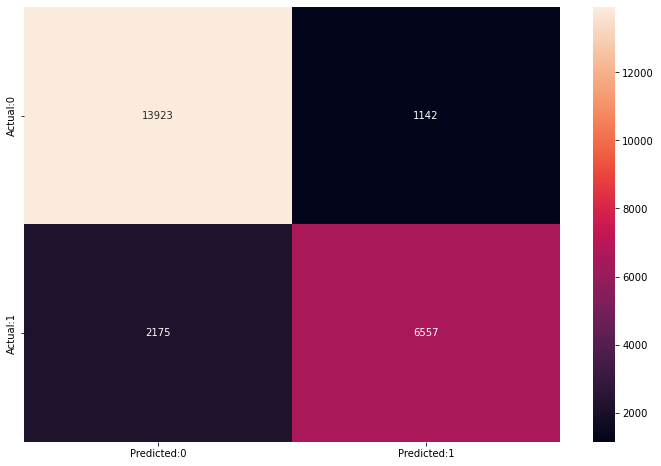

In [284]:
y_pred_xgb=xgb_model.predict(X_test)
cm = confusion_matrix(y_test,test_pred_xgb)
con_mat = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index = ['Actual:0', 'Actual:1'])
sns.heatmap(con_mat, annot = True, fmt = 'd')

##### Plotting the ROC curve

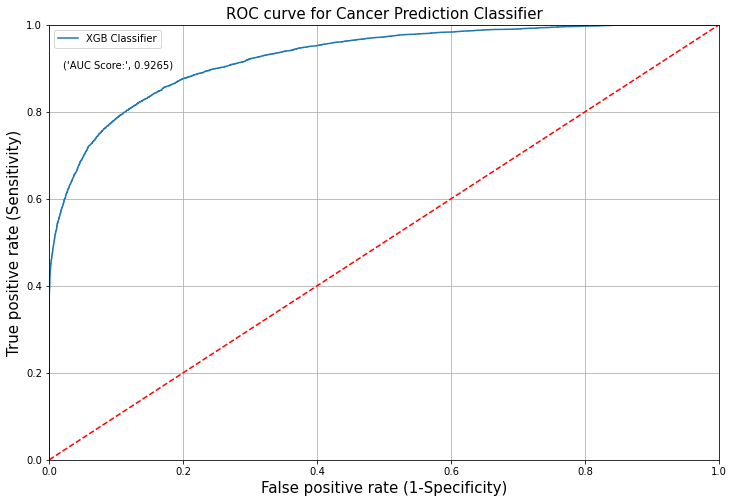

In [285]:
y_scores_xgb = xgb_model.predict_proba(X_test)
y_scores_xgb = y_scores_xgb[:, 1]
fpr_xgb, tpr_xgb, th_xgb = roc_curve(y_test, y_scores_xgb)
plt.plot(fpr_xgb,tpr_xgb,label='XGB Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],'r--')
plt.title('ROC curve for Cancer Prediction Classifier', fontsize =15)
plt.xlabel('False positive rate (1-Specificity)', fontsize=15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x=0.02, y=0.9, s=('AUC Score:', round(roc_auc_score(y_test, y_scores_xgb),4)))
plt.legend()
plt.grid(True)

**Interpretation:** From the above plot, we can see that our classifier (xgb_model) is away from the red dotted line; with the AUC score 0.9265.

In [286]:
score_card['XGB'] = [roc_auc_score(y_test, y_pred_xgb),precision_score(y_test,y_pred_xgb),
                    recall_score(y_test,y_pred_xgb),
                              accuracy_score(y_test,y_pred_xgb), cohen_kappa_score(y_test,y_pred_xgb), 
                    f1_score(y_test, y_pred_xgb)]

In [287]:
score_card

,Logistic Regression,Decision Tree,Random Forest,KNN,NB,Voting,Bagging,AdaBoost,GB,XGB
Metrics,,,,,,,,,,
AUC Score,0.755296,0.812266,0.831966,0.786202,0.671240,0.832463,0.836624,0.775264,0.834604,0.837556
Precision Score,0.784467,0.758449,0.844014,0.727200,0.483070,0.828934,0.820575,0.833053,0.854395,0.851669
Recall Score,0.607306,0.765918,0.743587,0.731448,0.901855,0.755268,0.770957,0.622881,0.742556,0.750916
Accuracy Score,0.794680,0.824600,0.855486,0.800773,0.609867,0.853007,0.854099,0.815817,0.859100,0.860613
Kappa Score,0.536037,0.623241,0.680963,0.571702,0.289692,0.677583,0.681914,0.581357,0.688140,0.692326
f1-score,0.684611,0.762165,0.790624,0.729318,0.629144,0.790388,0.794993,0.712797,0.794559,0.798125


In [288]:
acc_train_and_test['XGB']=[xgb_model.score(X_train,y_train),xgb_model.score(X_test,y_test)]
acc_train_and_test

,Logistic Regression,Decision Tree,Random Forest,KNN,NB,Voting,Bagging,AdaBoost,GB,XGB
set,,,,,,,,,,
training,0.792033,0.986217,0.977035,0.891467,0.609720,0.982739,0.982057,0.813317,0.907415,0.905797
testing,0.794680,0.824600,0.855486,0.800773,0.609867,0.853007,0.854099,0.815817,0.859100,0.860613


## Tuned XGB Classifier

In [289]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}

xgb_model = XGBClassifier()
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'f1_weighted')
xgb_grid.fit(X_train, y_train)
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

[13:38:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:38:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:38:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:38:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:43:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:43:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:43:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:43:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:47:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:48:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:48:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:48:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:53:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:53:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:54:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:54:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:58:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:58:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:58:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:58:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:02:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:02:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:03:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:03:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:08:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:08:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:08:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:09:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:13:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:13:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:18:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:23:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:23:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:23:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:23:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:28:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:28:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:29:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:29:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:33:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:33:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:33:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:34:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:39:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:39:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:39:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:39:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:44:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:45:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:45:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:45:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:50:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:50:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:51:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:51:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:56:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:56:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:56:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:56:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:02:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:02:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:02:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:02:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:07:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:07:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:08:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:08:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:12:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:13:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:13:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:13:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:17:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:22:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:23:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:23:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:23:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:28:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:28:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:28:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:28:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:32:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:32:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:32:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:32:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:36:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:36:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:37:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:37:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

gamma=0
learning_rate=0.3
max_depth=9

In [290]:
tuned_xgb=XGBClassifier(gamma=0,learning_rate=0.3,max_depth=9  )

In [291]:
tuned_xgb=tuned_xgb.fit(X_train,y_train)

[15:44:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [292]:
train_pred_txgb=tuned_xgb.predict(X_train)
print(classification_report(y_train,train_pred_txgb))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     59806
           1       0.90      0.80      0.85     35382

    accuracy                           0.89     95188
   macro avg       0.90      0.87      0.88     95188
weighted avg       0.89      0.89      0.89     95188



In [293]:
test_pred_txgb=tuned_xgb.predict(X_test)
print(classification_report(y_test,test_pred_txgb))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89     15065
           1       0.85      0.74      0.79      8732

    accuracy                           0.86     23797
   macro avg       0.86      0.83      0.84     23797
weighted avg       0.86      0.86      0.86     23797



<AxesSubplot:>

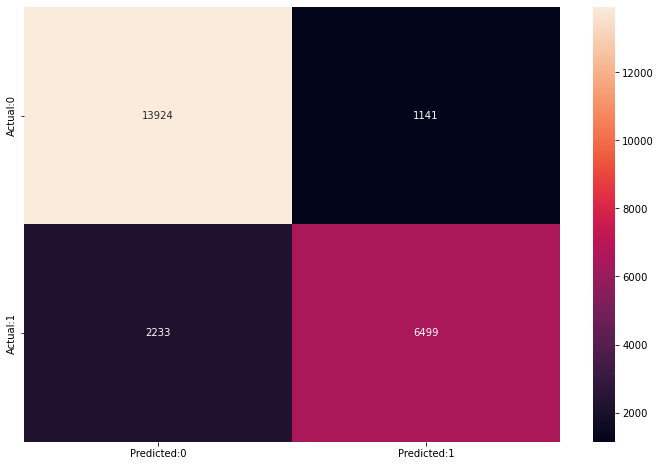

In [294]:
y_pred_txgb=tuned_xgb.predict(X_test)
cm = confusion_matrix(y_test,y_pred_txgb)
con_mat = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index = ['Actual:0', 'Actual:1'])
sns.heatmap(con_mat, annot = True, fmt = 'd')

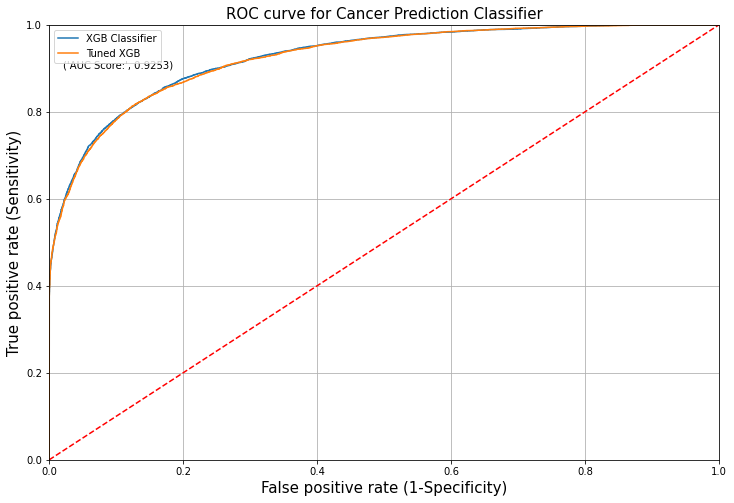

In [295]:
y_scores_txgb = tuned_xgb.predict_proba(X_test)
y_scores_txgb = y_scores_txgb[:, 1]
fpr_txgb, tpr_txgb, th_txgb = roc_curve(y_test, y_scores_txgb)
plt.plot(fpr_xgb,tpr_xgb,label='XGB Classifier')
plt.plot(fpr_txgb,tpr_txgb,label='Tuned XGB')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],'r--')
plt.title('ROC curve for Cancer Prediction Classifier', fontsize =15)
plt.xlabel('False positive rate (1-Specificity)', fontsize=15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x=0.02, y=0.9, s=('AUC Score:', round(roc_auc_score(y_test, y_scores_txgb),4)))
plt.legend()
plt.grid(True)

In [296]:
score_card_Tuned['XGB'] = [roc_auc_score(y_test, y_pred_txgb),precision_score(y_test,y_pred_txgb),
                    recall_score(y_test,y_pred_txgb),
                              accuracy_score(y_test,y_pred_txgb), cohen_kappa_score(y_test,y_pred_txgb), 
                    f1_score(y_test, y_pred_txgb)]
score_card_Tuned

,Logistic Regression,Decision_Tree,Random Forest,KNN,XGB
Metrics,,,,,
AUC Score,0.778010,0.724391,0.831966,0.800302,0.834268
Precision Score,0.690341,0.641608,0.844014,0.783875,0.850654
Recall Score,0.751374,0.663651,0.743587,0.714842,0.744274
Accuracy Score,0.785099,0.740556,0.855486,0.823045,0.858217
Kappa Score,0.545877,0.445564,0.680963,0.611931,0.686583
f1-score,0.719566,0.652443,0.790624,0.747769,0.793916


In [297]:
acc_tuned_train_and_test['XGB']=[tuned_xgb.score(X_train,y_train),tuned_xgb.score(X_test,y_test)]
acc_tuned_train_and_test

,Logistic Regression,Decision Tree,Random Forest,XGB
set,,,,
training,0.784122,0.734494,0.977035,0.893800
testing,0.785099,0.740556,0.855486,0.858217


## LGBMClassifier

In [298]:
from lightgbm import LGBMClassifier

In [299]:
lgbm = LGBMClassifier()

In [300]:
lgbm.fit(X_train, y_train)

LGBMClassifier()

In [301]:
lgbm.score(X_train, y_train)

0.8431314871622474

In [302]:
lgbm.score(X_test, y_test)

0.8407782493591629

<AxesSubplot:>

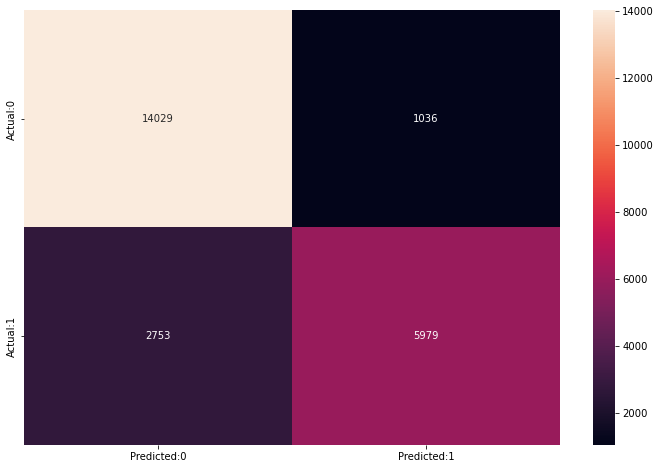

In [303]:
y_pred_lgbm=lgbm.predict(X_test)
cm = confusion_matrix(y_test,y_pred_lgbm)
con_mat = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index = ['Actual:0', 'Actual:1'])
sns.heatmap(con_mat, annot = True, fmt = 'd')

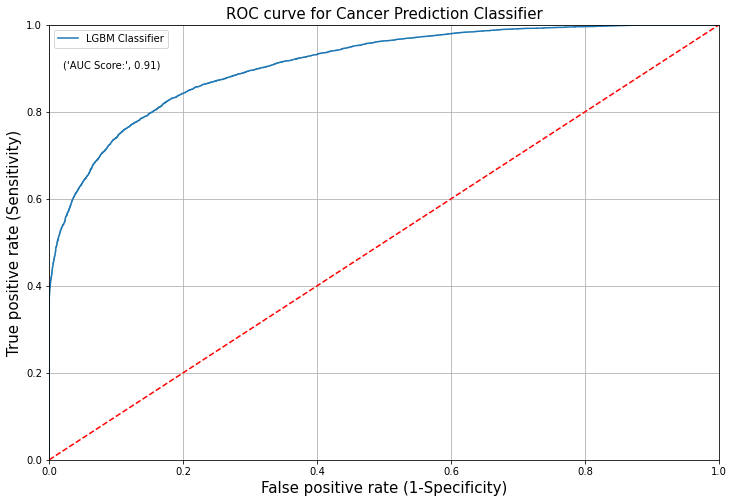

In [304]:
y_scores_lgbm= lgbm.predict_proba(X_test)
y_scores_lgbm = y_scores_lgbm[:, 1]
fpr_lgbm, tpr_lgbm, th_lgbm = roc_curve(y_test, y_scores_lgbm)
plt.plot(fpr_lgbm,tpr_lgbm,label='LGBM Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],'r--')
plt.title('ROC curve for Cancer Prediction Classifier', fontsize =15)
plt.xlabel('False positive rate (1-Specificity)', fontsize=15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x=0.02, y=0.9, s=('AUC Score:', round(roc_auc_score(y_test, y_scores_lgbm),4)))
plt.legend()
plt.grid(True)

In [306]:
score_card['LGBM'] = [roc_auc_score(y_test, y_pred_lgbm),precision_score(y_test,y_pred_lgbm),
                    recall_score(y_test,y_pred_lgbm),
                              accuracy_score(y_test,y_pred_lgbm), cohen_kappa_score(y_test,y_pred_lgbm), 
                    f1_score(y_test, y_pred_lgbm)]
score_card

,Logistic Regression,Decision Tree,Random Forest,KNN,NB,Voting,Bagging,AdaBoost,GB,XGB,LGBM
Metrics,,,,,,,,,,,
AUC Score,0.755296,0.812266,0.831966,0.786202,0.671240,0.832463,0.836624,0.775264,0.834604,0.837556,0.807977
Precision Score,0.784467,0.758449,0.844014,0.727200,0.483070,0.828934,0.820575,0.833053,0.854395,0.851669,0.852316
Recall Score,0.607306,0.765918,0.743587,0.731448,0.901855,0.755268,0.770957,0.622881,0.742556,0.750916,0.684723
Accuracy Score,0.794680,0.824600,0.855486,0.800773,0.609867,0.853007,0.854099,0.815817,0.859100,0.860613,0.840778
Kappa Score,0.536037,0.623241,0.680963,0.571702,0.289692,0.677583,0.681914,0.581357,0.688140,0.692326,0.642509
f1-score,0.684611,0.762165,0.790624,0.729318,0.629144,0.790388,0.794993,0.712797,0.794559,0.798125,0.759383


In [310]:
acc_train_and_test['LGBM']=[lgbm.score(X_train,y_train),lgbm.score(X_test,y_test)]
acc_train_and_test

,Logistic Regression,Decision Tree,Random Forest,KNN,NB,Voting,Bagging,AdaBoost,GB,XGB,LGBM
set,,,,,,,,,,,
training,0.792033,0.986217,0.977035,0.891467,0.609720,0.982739,0.982057,0.813317,0.907415,0.905797,0.843131
testing,0.794680,0.824600,0.855486,0.800773,0.609867,0.853007,0.854099,0.815817,0.859100,0.860613,0.840778


In [322]:
score_card.T

Metrics,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
Logistic Regression,0.755296,0.784467,0.607306,0.794680,0.536037,0.684611
Decision Tree,0.812266,0.758449,0.765918,0.824600,0.623241,0.762165
Random Forest,0.831966,0.844014,0.743587,0.855486,0.680963,0.790624
KNN,0.786202,0.727200,0.731448,0.800773,0.571702,0.729318
NB,0.671240,0.483070,0.901855,0.609867,0.289692,0.629144
Voting,0.832463,0.828934,0.755268,0.853007,0.677583,0.790388
Bagging,0.836624,0.820575,0.770957,0.854099,0.681914,0.794993
AdaBoost,0.775264,0.833053,0.622881,0.815817,0.581357,0.712797
GB,0.834604,0.854395,0.742556,0.859100,0.688140,0.794559
XGB,0.837556,0.851669,0.750916,0.860613,0.692326,0.798125


In [337]:
acc_train_and_test.T

set,training,testing
Logistic Regression,0.792033,0.794680
Decision Tree,0.986217,0.824600
Random Forest,0.977035,0.855486
KNN,0.891467,0.800773
NB,0.609720,0.609867
Voting,0.982739,0.853007
Bagging,0.982057,0.854099
AdaBoost,0.813317,0.815817
GB,0.907415,0.859100
XGB,0.905797,0.860613


In [339]:
score_card_Tuned

,Logistic Regression,Decision_Tree,Random Forest,KNN,XGB,Bagging
Metrics,,,,,,
AUC Score,0.778010,0.724391,0.831966,0.800302,0.834268,0.500000
Precision Score,0.690341,0.641608,0.844014,0.783875,0.850654,0.000000
Recall Score,0.751374,0.663651,0.743587,0.714842,0.744274,0.000000
Accuracy Score,0.785099,0.740556,0.855486,0.823045,0.858217,0.633063
Kappa Score,0.545877,0.445564,0.680963,0.611931,0.686583,0.000000
f1-score,0.719566,0.652443,0.790624,0.747769,0.793916,0.000000


In [340]:
acc_tuned_train_and_test.T

set,training,testing
Logistic Regression,0.784122,0.785099
Decision Tree,0.734494,0.740556
Random Forest,0.977035,0.855486
XGB,0.893800,0.858217
KNN,0.865067,0.823045
Bagging,0.628293,0.633063


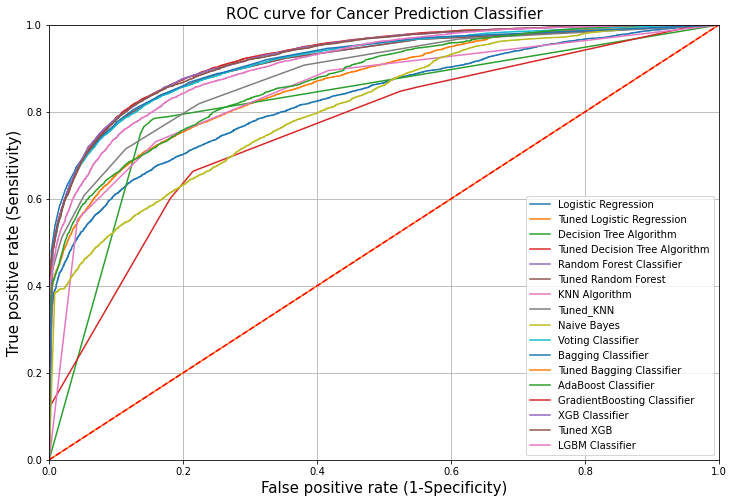

In [335]:
plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.plot(fpr_best_log, tpr_best_log, label = 'Tuned Logistic Regression')

plt.plot(fpr_dt, tpr_dt, label = 'Decision Tree Algorithm')
plt.plot(fpr_bestdt, tpr_bestdt, label = 'Tuned Decision Tree Algorithm')

plt.plot(fpr_rf,tpr_rf,label='Random Forest Classifier')
plt.plot(fpr_trf, tpr_trf,label='Tuned Random Forest')

plt.plot(fpr_KNN, tpr_KNN,label='KNN Algorithm')
plt.plot(fpr_TKNN, tpr_TKNN,label='Tuned_KNN')

plt.plot(fpr_gnb, tpr_gnb,label='Naive Bayes')
plt.plot(fpr_vote,tpr_vote,label='Voting Classifier')

plt.plot(fpr_bag,tpr_bag,label='Bagging Classifier')
plt.plot(fpr_tbag,tpr_tbag,label='Tuned Bagging Classifier')

plt.plot(fpr_ada,tpr_ada,label='AdaBoost Classifier')
plt.plot(fpr_gb,tpr_gb,label='GradientBoosting Classifier')

plt.plot(fpr_xgb,tpr_xgb,label='XGB Classifier')
plt.plot(fpr_txgb,tpr_txgb,label='Tuned XGB')
plt.plot(fpr_lgbm,tpr_lgbm,label='LGBM Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],'r--')
plt.title('ROC curve for Cancer Prediction Classifier', fontsize =15)
plt.xlabel('False positive rate (1-Specificity)', fontsize=15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.legend()
plt.grid(True)
plt.show()

In [336]:
print('roc_scores-Logistic Regression:',  roc_auc_score(y_test, y_scores))
print('roc_scores-Tuned Logistic Regression:',  roc_auc_score(y_test, y_scores_best))
print('roc_scores-Decision Tree Algorithm:', roc_auc_score(y_test, y_scores_dt))
print('roc-scores-Tuned Decision Tree Algorithm:',  roc_auc_score(y_test,y_scores_bestdt))
print('roc_scores-Random Forest Classifier:',  roc_auc_score(y_test, y_scores_rf))
print('roc_scores-Tuned Random Forest Classifier:',  roc_auc_score(y_test, y_scores_trf))
print('roc_scores-KNeighbors Classifier:',  roc_auc_score(y_test, y_scores_KNN))
print('roc_scores-Tuned KNN Classifier:',  roc_auc_score(y_test, y_scores_TKNN))
print('roc_scores-GNB Classifier:',  roc_auc_score(y_test, y_scores_gnb))
print('roc_scores-Soft Voting Classifier:', roc_auc_score(y_test, y_scores_vote))
print('roc_scores-Bagging Classifier:',  roc_auc_score(y_test, y_scores_bag))
print('roc_scores- Tuned Bagging Classifier:',  roc_auc_score(y_test, y_scores_tbag))
print('roc_scores-Adaboost Classifier:',  roc_auc_score(y_test, y_scores_ada))
print('roc_scores-Gradient Boosting Classifier:',  roc_auc_score(y_test, y_scores_gb))
print('roc_scores-XGB Classifier:', roc_auc_score(y_test, y_scores_xgb))
print('roc_scores-Tuned XGB Classifier:', roc_auc_score(y_test, y_scores_txgb))
print('roc_scores- Light GBM Classifier:',  roc_auc_score(y_test, y_scores_lgbm))

roc_scores-Logistic Regression: 0.8295867928547223
roc_scores-Tuned Logistic Regression: 0.8655176704885031
roc_scores-Decision Tree Algorithm: 0.8189452820036675
roc-scores-Tuned Decision Tree Algorithm: 0.7622741748650944
roc_scores-Random Forest Classifier: 0.9125796308833657
roc_scores-Tuned Random Forest Classifier: 0.9125796308833657
roc_scores-KNeighbors Classifier: 0.8489027316199964
roc_scores-Tuned KNN Classifier: 0.8854887182265154
roc_scores-GNB Classifier: 0.8101788759625985
roc_scores-Soft Voting Classifier: 0.9161534784600371
roc_scores-Bagging Classifier: 0.9168873232027529
roc_scores- Tuned Bagging Classifier: 0.5
roc_scores-Adaboost Classifier: 0.8725163511179757
roc_scores-Gradient Boosting Classifier: 0.9270528313785781
roc_scores-XGB Classifier: 0.9265309251603109
roc_scores-Tuned XGB Classifier: 0.925250783784848
roc_scores- Light GBM Classifier: 0.9100419141119891


## Identify the Important Features using XGB Classifier

In [331]:
xgb_model=xgb_model.fit(X_train,y_train)

[17:07:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


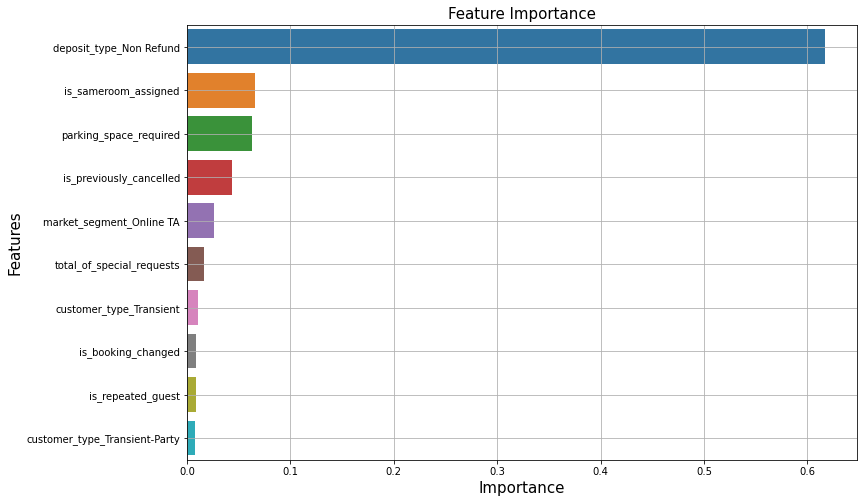

In [342]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': xgb_model.feature_importances_})
important_features = important_features.sort_values('Importance', ascending = False)[:10]

sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.grid(True)

plt.show()